### Project Setup and File Conversions

In [1]:
import os
print(os.getcwd())
directories = ['/data/converted/','data/raw','/resources/assets','/resources/generated-charts']
for dir in directories:
    os.makedirs(dir, exist_ok=True) 

F:\Docs\MASTERS\Internship\Dusatu\population-project


In [2]:
import pandas as pd
import os
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
from geopy.geocoders import Nominatim
import random
import requests
from fpdf import FPDF
import plotly as pl
import plotly.graph_objects as go
import plotly.io as pio
import folium
from folium.plugins import HeatMap
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Analysis of Inflow and Outflow of Immigrants Across EU

### Data Source Loading and Examination

In [3]:
file = 'Inflows of foreign population by nationality.xls'
df = pd.read_excel(f'data/converted/{file}')
df.head(10)

Refresh  \
0  Dataset: International Migration Database   
1               Country of birth/nationality   
2                                   Variable   
3                                     Gender   
4                                       Year   
5                                    Country   
6                                  Australia   
7                                    Austria   
8                                    Belgium   
9                                     Canada   

  Sorry, the query is too large to fit into the Excel cell. You will not be able to update your table with the .Stat Populator.  \
0                                                NaN                                                                              
1                                                NaN                                                                              
2                                                NaN                                                                              
3                                                NaN                                                                              
4                                                NaN                                                                              
5                                                NaN                                                                              
6                                                  i                                                                              
7                                                  i                                                                              
8                                                  i                                                                              
9                                                  i                                                                              

                                     Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0                                           NaN        NaN        NaN   
1                                         Total        NaN        NaN   
2  Inflows of foreign population by nationality        NaN        NaN   
3                                         Total        NaN        NaN   
4                                          2000       2001       2002   
5                                           NaN        NaN        NaN   
6                                        107148     127877     119080   
7                                         65954      74786      86144   
8                                         57295      65974      70230   
9                                        227455     250640     228919   

  Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 15  \
0        NaN        NaN        NaN        NaN        NaN  ...         NaN   
1        NaN        NaN        NaN        NaN        NaN  ...         NaN   
2        NaN        NaN        NaN        NaN        NaN  ...         NaN   
3        NaN        NaN        NaN        NaN        NaN  ...         NaN   
4       2003       2004       2005       2006       2007  ...        2013   
5        NaN        NaN        NaN        NaN        NaN  ...         NaN   
6     123411     146441     161734     176205     189490  ...      244849   
7      93341     104246      97995      82899      91546  ...      135228   
8      68800      72446      77411      83433      93387  ...      105529   
9     221349     235822     262244     251641     236751  ...      259034   

  Unnamed: 16  Unnamed: 17 Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21  \
0         NaN          NaN         NaN         NaN         NaN         NaN   
1         NaN          NaN         NaN         NaN         NaN         NaN   
2         NaN          NaN         NaN         NaN         NaN         NaN   
3         NaN          NaN         NaN         NaN         NaN         NaN   
4        2014         20

In [4]:
file = 'Outflows of foreign population by nationality.xls'
df = pd.read_excel(f'data/converted/{file}')
df.head(10)

Refresh  \
0  Dataset: International Migration Database   
1               Country of birth/nationality   
2                                   Variable   
3                                     Gender   
4                                       Year   
5                                    Country   
6                                  Australia   
7                                    Austria   
8                                    Belgium   
9                                     Canada   

  Sorry, the query is too large to fit into the Excel cell. You will not be able to update your table with the .Stat Populator.  \
0                                                NaN                                                                              
1                                                NaN                                                                              
2                                                NaN                                                                              
3                                                NaN                                                                              
4                                                NaN                                                                              
5                                                NaN                                                                              
6                                                  i                                                                              
7                                                  i                                                                              
8                                                  i                                                                              
9                                                NaN                                                                              

                                      Unnamed: 2 Unnamed: 3  Unnamed: 4  \
0                                            NaN        NaN         NaN   
1                                          Total        NaN         NaN   
2  Outflows of foreign population by nationality        NaN         NaN   
3                                          Total        NaN         NaN   
4                                           2000        NaN      2001.0   
5                                            NaN        NaN         NaN   
6                                            NaN       9107         NaN   
7                                            NaN      44350         NaN   
8                                            NaN      35568         NaN   
9                                            NaN         ..         NaN   

  Unnamed: 5  Unnamed: 6 Unnamed: 7  Unnamed: 8 Unnamed: 9  ...  Unnamed: 38  \
0        NaN         NaN        NaN         NaN        NaN  ...          NaN   
1        NaN         NaN        NaN         NaN        NaN  ...          NaN   
2        NaN         NaN        NaN         NaN        NaN  ...          NaN   
3        NaN         NaN        NaN         NaN        NaN  ...          NaN   
4        NaN      2002.0        NaN      2003.0        NaN  ...       2018.0   
5        NaN         NaN        NaN         NaN        NaN  ...          NaN   
6      10644         NaN         ..         NaN         ..  ...          NaN   
7      51004         NaN      44478         NaN      48940  ...          NaN   
8      31391         NaN      31046         NaN      33921  ...          NaN   
9         ..         NaN         ..         NaN         ..  ...          NaN   

  Unnamed: 39  Unnamed: 40 Unnamed: 41  Unnamed: 42 Unnamed: 43  Unnamed: 44  \
0         NaN          NaN         NaN          NaN         NaN          NaN   
1         NaN          NaN         NaN          NaN         NaN          NaN   
2         NaN          NaN         NaN          NaN         NaN          NaN   
3         NaN          NaN         NaN 

### Data Cleaning

In [5]:
inflow_df = pd.read_excel(f'data/converted/Inflows of foreign population by nationality.xls')
inflow_df = inflow_df.drop(inflow_df.index[:4])
inflow_df = inflow_df.drop(inflow_df.columns[1], axis = 1)
years = inflow_df.iloc[0]
inflow_df = inflow_df.drop(inflow_df.index[:2])
inflow_df = inflow_df.drop(inflow_df.index[-1])
inflow_df.reset_index(inplace = True, drop = True)
# df.columns.values[1:] = years
years.name = None
inflow_df.columns = years
inflow_df.columns.values[0] = 'Country'
inflow_df.set_index('Country', inplace = True)
inflow_df.replace("...", np.nan, inplace=True)
inflow_df = inflow_df.apply(pd.to_numeric, errors='coerce')
# inflow_df = inflow_df.ffill()
inflow_df.interpolate(method='linear', limit_area='outside', axis=1, inplace=True)
inflow_df.reset_index(inplace=True)
inflow_df = inflow_df.melt(id_vars=['Country'], var_name='Year', value_name='Population')
inflow_df.columns = ['Country', 'Year', 'Inflow Population']
inflow_df['Year'] = inflow_df['Year'].apply(lambda year: datetime.datetime.strptime(str(int(year)), '%Y').strftime('%Y'))
#df['Population'] = df['Population'].apply(lambda pop: int(pop))
#df.to_excel(f'data/cleaned/{file}x')
inflow_df

Country  Year  Inflow Population
0         Australia  2000           107148.0
1           Austria  2000            65954.0
2           Belgium  2000            57295.0
3            Canada  2000           227455.0
4             Chile  2000            18741.0
..              ...   ...                ...
800          Sweden  2022            74626.0
801     Switzerland  2022           141549.0
802         Türkiye  2022           615095.0
803  United Kingdom  2022           507000.0
804   United States  2022           740002.0

[805 rows x 3 columns]

In [6]:
outflow_df = pd.read_excel(f'data/converted/Outflows of foreign population by nationality.xls')
outflow_df.drop(outflow_df.index[:4], inplace =True)
outflow_df.drop(outflow_df.index[1], inplace = True)
outflow_df.drop(outflow_df.index[-1], inplace = True)
outflow_df.drop(outflow_df.columns[1], axis = 1, inplace = True)
years = outflow_df.iloc[0]
years.dropna(inplace=True)
years.name = None

outflow_df.drop(outflow_df.index[0], inplace = True)
outflow_df.reset_index(inplace = True, drop = True)
outflow_df.dropna(axis=1, how='all', inplace=True)
outflow_df.columns = years
outflow_df.columns.values[0] = 'Country'
outflow_df.set_index('Country', inplace = True)
outflow_df.replace("...", np.nan, inplace=True)
outflow_df = outflow_df.apply(pd.to_numeric, errors='coerce')
# outflow_df = outflow_df.ffill()
outflow_df.interpolate(method='linear', limit_area='outside', axis=1, inplace=True)
outflow_df.reset_index(inplace=True)
outflow_df = outflow_df.melt(id_vars=['Country'], var_name='Year', value_name='Population')
outflow_df.columns = ['Country', 'Year', 'Outflow Population']
outflow_df['Year'] = outflow_df['Year'].apply(lambda year: datetime.datetime.strptime(str(int(year)), '%Y').strftime('%Y'))

outflow_df

C:\Users\Don Veets\AppData\Local\Temp\ipykernel_25576\500911030.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years.dropna(inplace=True)


Country  Year  Outflow Population
0         Australia  2000              9107.0
1           Austria  2000             44350.0
2           Belgium  2000             35568.0
3            Canada  2000                 NaN
4             Chile  2000                 NaN
..              ...   ...                 ...
800          Sweden  2022             22841.0
801     Switzerland  2022             74392.0
802         Türkiye  2022            184038.0
803  United Kingdom  2022            202000.0
804   United States  2022                 NaN

[805 rows x 3 columns]

In [7]:
population_df = pd.merge(inflow_df, outflow_df, on=['Country', 'Year'], how='outer')
population_df.loc[population_df['Country'] == 'Slovak Republic', 'Country'] = 'Slovakia'
schengen_countries = [
    'Austria', 'Belgium', 'Croatia', 'Czechia', 'Denmark', 'Estonia',
    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
    'Malta', 'Netherlands', 'Poland', 'Portugal', 'Slovakia', 'Slovenia', 'Spain','Sweden']

population_df = population_df[population_df['Country'].isin(schengen_countries)]

## Data Analysis and Visualization

### Part 1: Visualizing Migrant Populations for each EU country

#### Change in Immigrant Population Across EU in latest year(2022)

In [8]:
year = '2022'
# Only Countries Belonging to both EU and Schengen are included
country_data = population_df[population_df['Year'] == year].sort_values(by='Inflow Population', ascending=False)

inflow_bar = go.Bar(y=country_data['Country'],
                    x=country_data["Inflow Population"],
                    marker=dict(color='#fa8635'),
                    orientation='h',
                    name = 'inflow'
                   )

outflow_bar = go.Bar(y=country_data['Country'],
                    x=country_data["Outflow Population"],
                    marker=dict(color='#000000'),
                    orientation='h',
                    name = 'outflow')

country_fig = go.Figure(data=[inflow_bar, outflow_bar])
country_fig.update_layout(
    title=f'Change in Immigrant Population Across EU in {year}',
    xaxis_title='Country',
    yaxis_title='Inflow Population',
    height = 800,
    yaxis=dict(autorange='reversed'),
    plot_bgcolor='rgba(0,0,0,0)',  
    paper_bgcolor='rgba(0,0,0,0)'
)

pio.write_image(country_fig, f'resources/generated-charts/bar-chart-inflow-{year}.png')
country_fig.show()

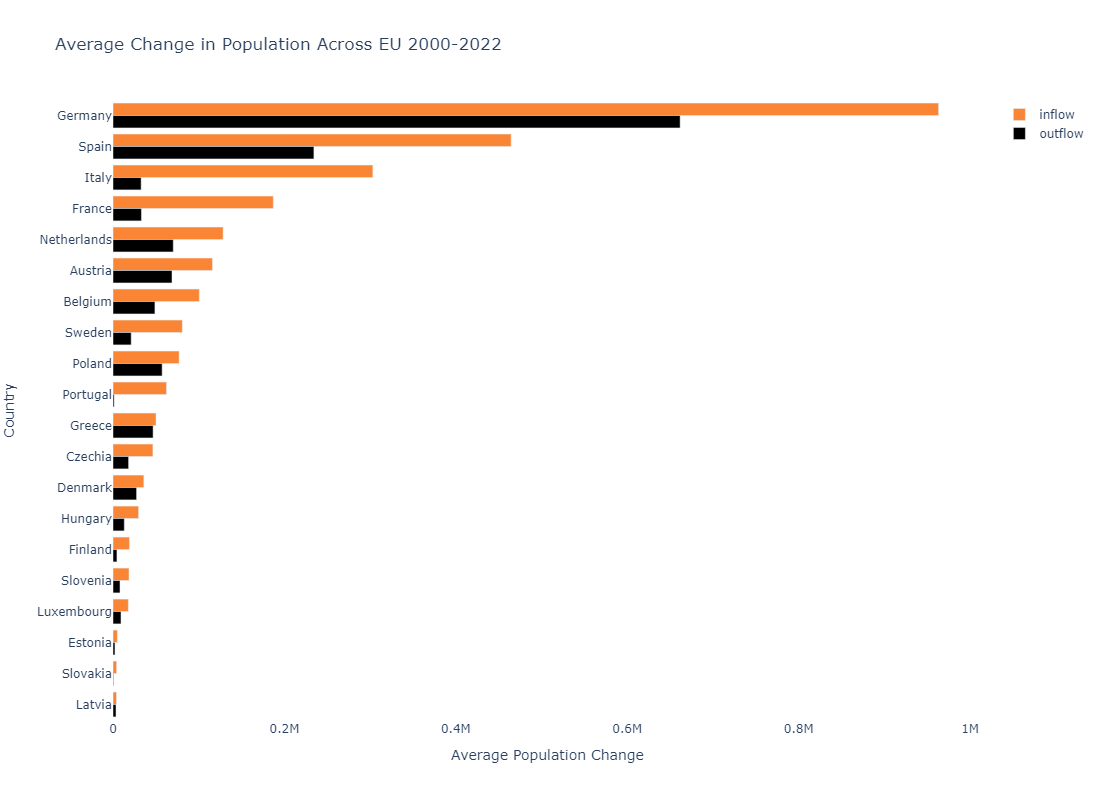

In [9]:
all_country_data = population_df

per_country_avgs = {
    'Country': [],
    'Average Inflow' : [],
    'Average Outflow': []
}

for country in all_country_data['Country'].unique():
    yearly_data = all_country_data[all_country_data['Country'] == country]
    per_country_avgs['Country'].append(country)
    per_country_avgs['Average Inflow'].append(yearly_data['Inflow Population'].mean())
    per_country_avgs['Average Outflow'].append(yearly_data['Outflow Population'].mean())

per_country_avg_df = pd.DataFrame(per_country_avgs)
per_country_avg_df = per_country_avg_df.sort_values(by='Average Inflow', ascending=False)
inflow_bar = go.Bar(y=per_country_avg_df['Country'],
                    x=per_country_avg_df['Average Inflow'],
                    marker=dict(color='#fa8635'),
                    orientation='h',
                    name = 'inflow'
                   )

outflow_bar = go.Bar(y=per_country_avg_df['Country'],
                    x=per_country_avg_df['Average Outflow'],
                    marker=dict(color='#000000'),
                    orientation='h',
                    name = 'outflow')

country_fig = go.Figure(data=[inflow_bar, outflow_bar])
country_fig.update_layout(
    title=f'Average Change in Population Across EU 2000-2022',
    yaxis_title='Country',
    xaxis_title='Average Population Change',
    height = 800,
    yaxis=dict(autorange='reversed'),
    plot_bgcolor='rgba(0,0,0,0)',  
    paper_bgcolor='rgba(0,0,0,0)'
)

pio.write_image(country_fig, f'resources/generated-charts/bar-chart-average-change.png')
country_fig.show()

### Part 2: Time Series Analysis of Countries

#### Visualization of population change over time across each EU country

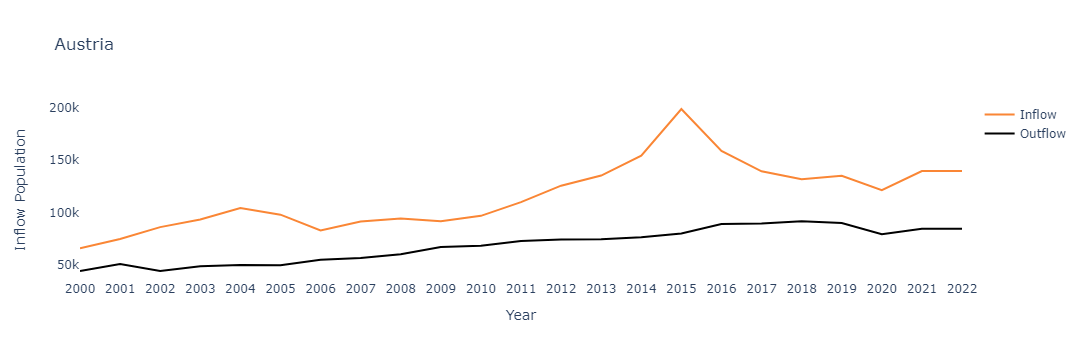

No Available Data for Croatia


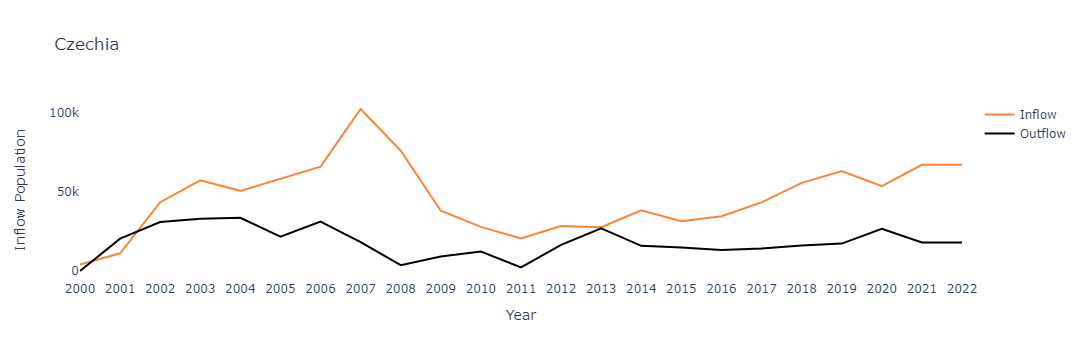

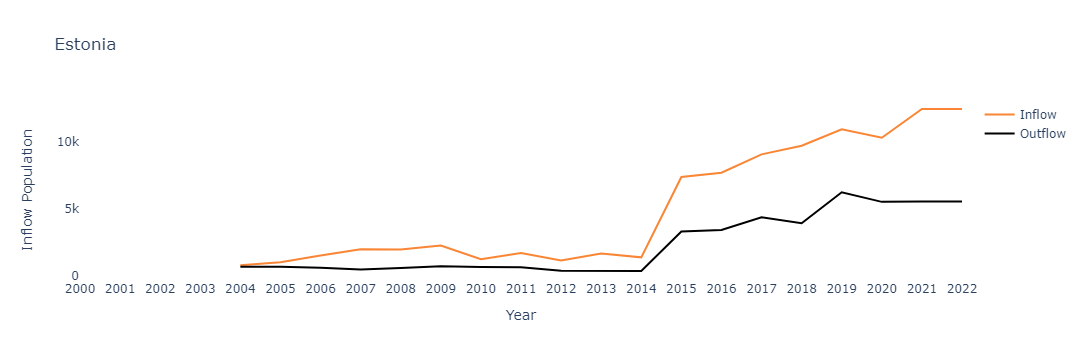

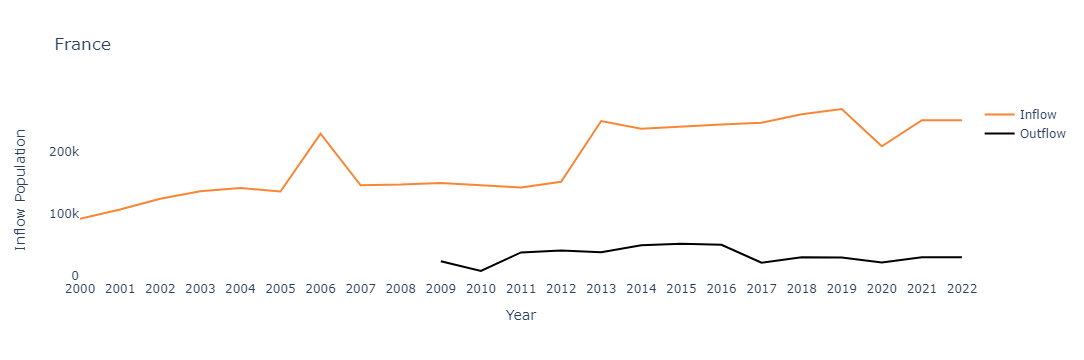

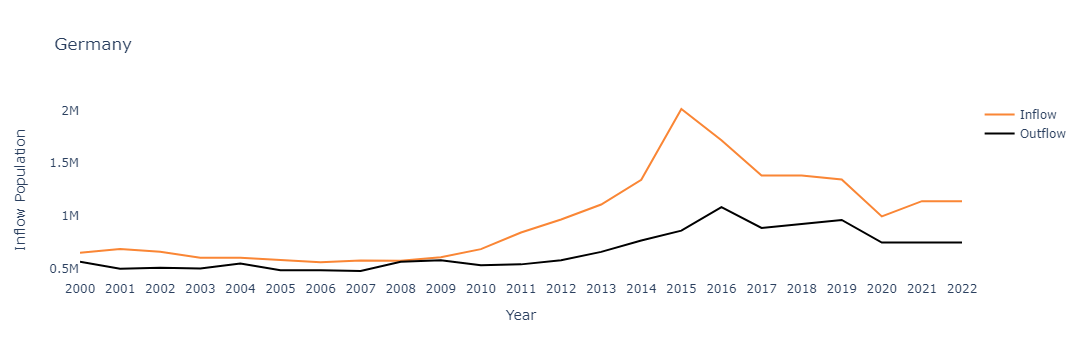

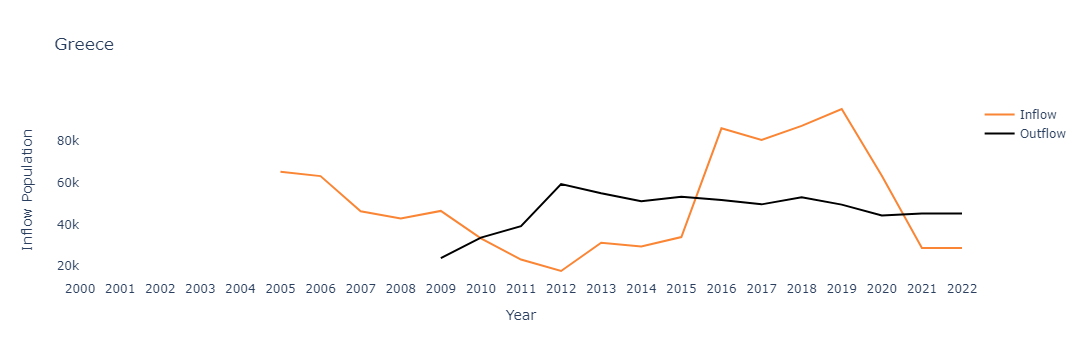

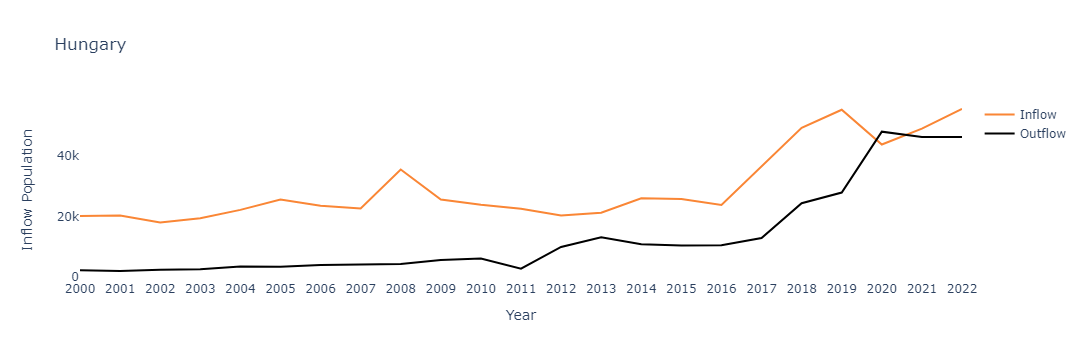

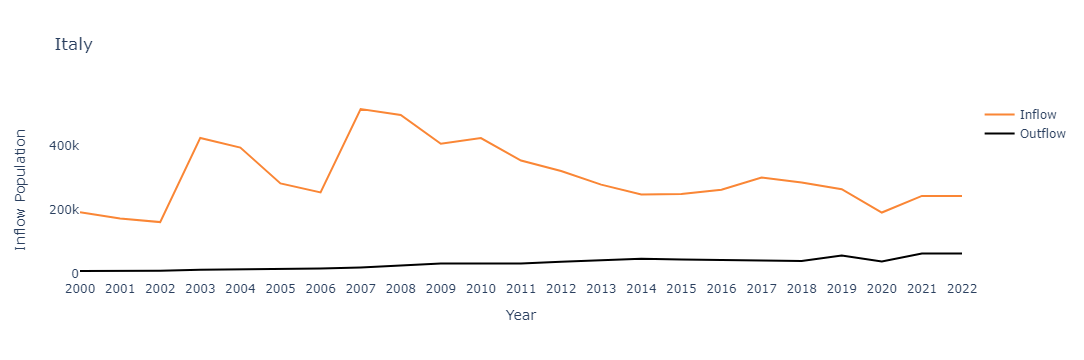

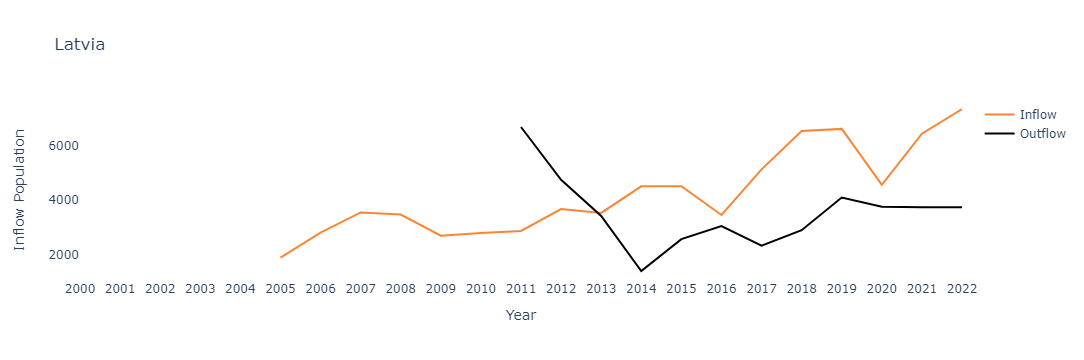

No Available Data for Lithuania


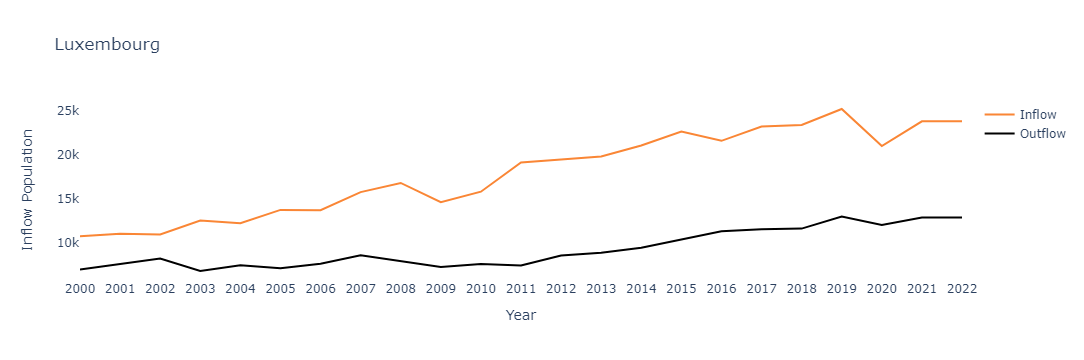

No Available Data for Malta


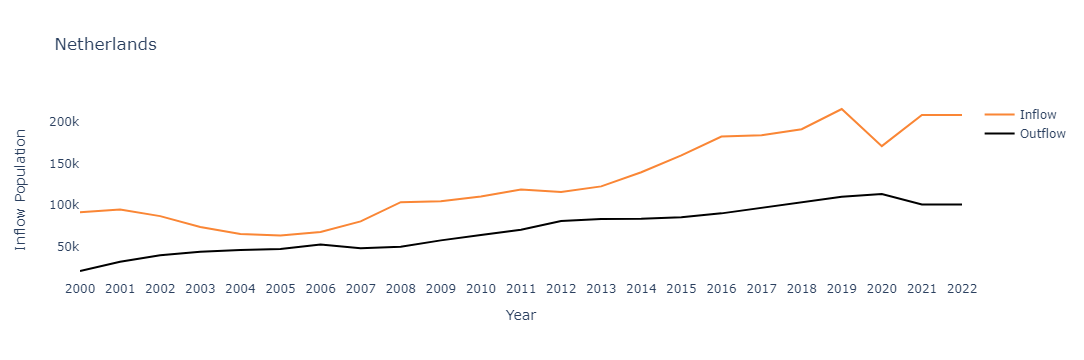

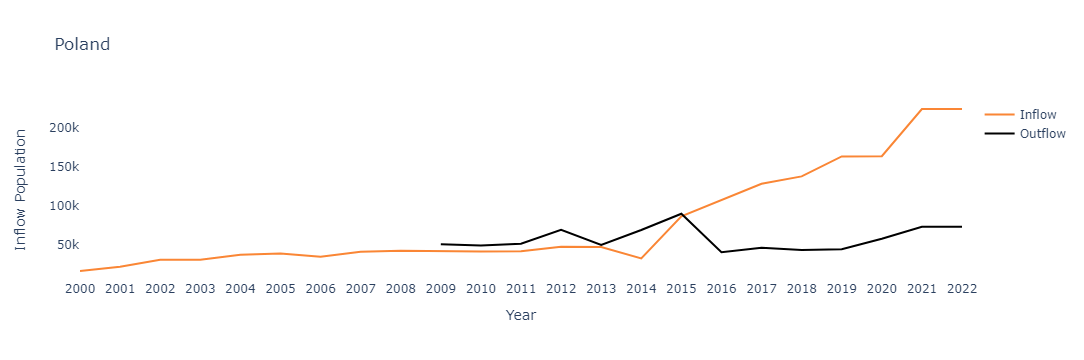

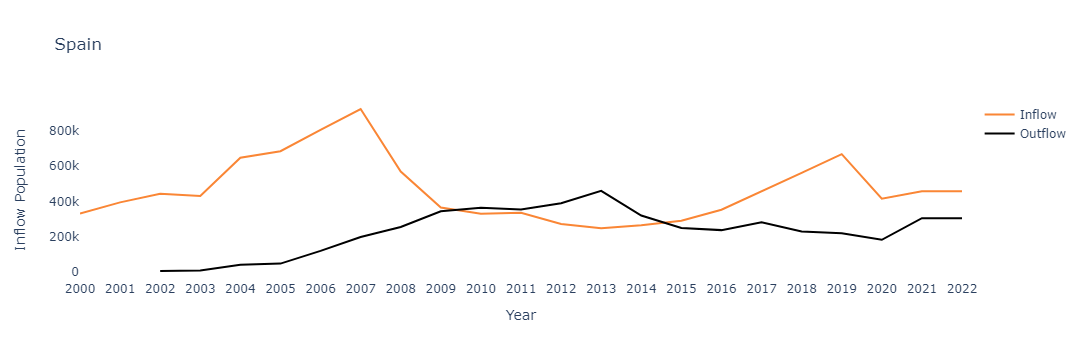

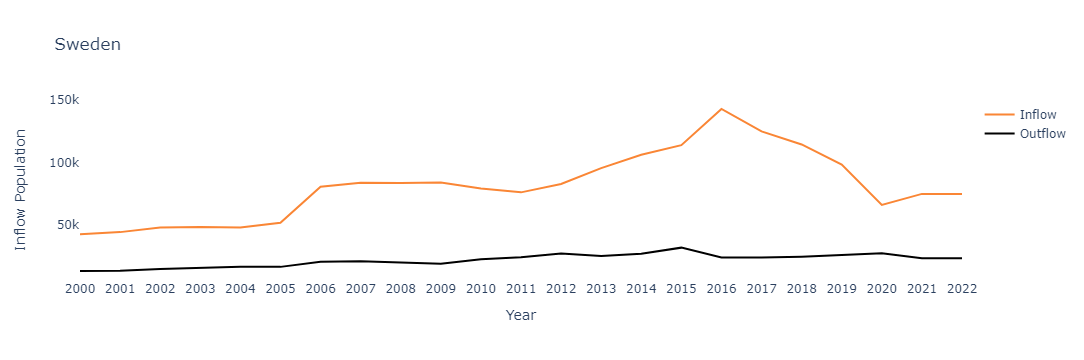

In [10]:
time_series_plots = []
for country in schengen_countries:
    if country in population_df['Country'].values:
        selected_data = population_df[population_df['Country'] == country]
        trace = go.Scatter(
            x=selected_data['Year'],
            y=selected_data['Inflow Population'],
            mode='lines',  
            name='Inflow',
            line=dict(color='#fa8635')
        )
        trace2 = go.Scatter(
            x=selected_data['Year'],
            y=selected_data['Outflow Population'],
            mode='lines',  
            name='Outflow',
            line=dict(color='#000000')
        )
        layout = go.Layout(
            title=f'{country}',  # Title of the chart
            xaxis=dict(title='Year'),  # Label for the x-axis
            yaxis=dict(title='Inflow Population'),
            plot_bgcolor='rgba(0,0,0,0)',  
            paper_bgcolor='rgba(0,0,0,0)',
            width = 600
        )
        fig = go.Figure(data=[trace, trace2], layout = layout)
        
        pio.write_image(fig, f'resources/generated-charts/line-chart-inflow-{country}.png')
        fig.show()
    else:
        print(f'No Available Data for {country}')

#### Total Inflow and Outflow 2000 - 2022

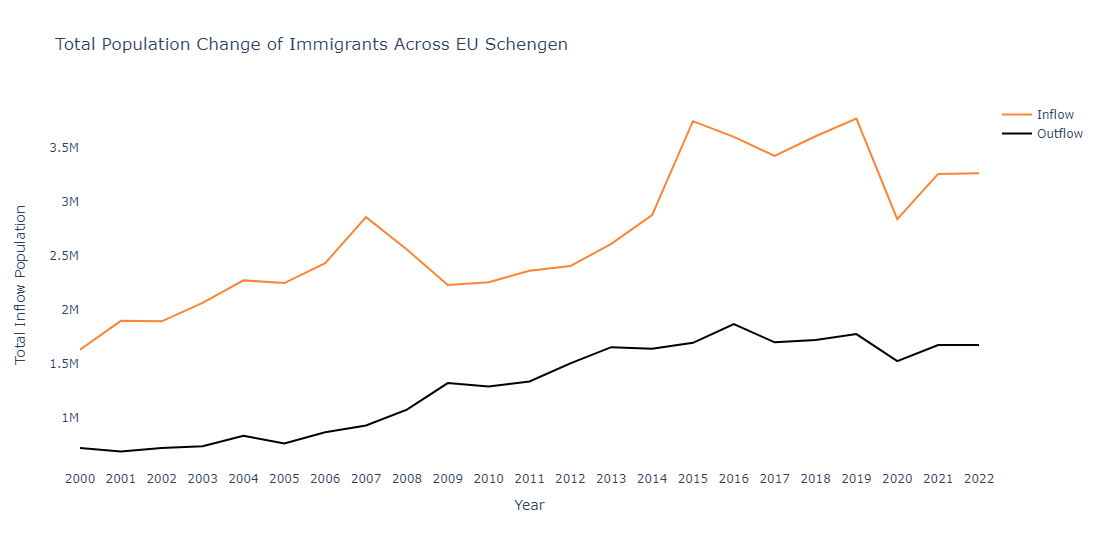

In [11]:
all_country_data = population_df

totals = {
    'Year': [],
    'Total Inflow' : [],
    'Total Outflow': []
}

for year in all_country_data['Year'].unique():
    yearly_data = all_country_data[all_country_data['Year'] == year]
    totals['Year'].append(year)
    totals['Total Inflow'].append(yearly_data['Inflow Population'].sum())
    totals['Total Outflow'].append(yearly_data['Outflow Population'].sum())

totals_df = pd.DataFrame(totals)

trace = go.Scatter(
    x=totals_df['Year'],
    y=totals_df['Total Inflow'],
    mode='lines',  
    name='Inflow',
    line=dict(color='#fa8635')
)

trace2 = go.Scatter(
    x=totals_df['Year'],
    y=totals_df['Total Outflow'],
    mode='lines',  
    name='Outflow',
    line=dict(color='#000000')
)

layout = go.Layout(
    title='Total Population Change of Immigrants Across EU Schengen',  
    xaxis=dict(title='Year'), 
    yaxis=dict(title='Total Inflow Population'),  
    height = 550,
    plot_bgcolor='rgba(0,0,0,0)',  
    paper_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure(data=[trace, trace2], layout=layout)
pio.write_image(fig, f'resources/generated-charts/line-chart-inflow-total.png')
fig

#### Analysis of Population Spikes/Dips

In [12]:
totals_df['Inflow Change'] = totals_df['Total Inflow'].diff()
totals_df['Abs Inflow Change'] = totals_df['Inflow Change'].abs()
top5 = totals_df[['Year','Inflow Change', 'Abs Inflow Change']].sort_values(by = 'Abs Inflow Change',ascending = False).head(5)
top5

Year  Inflow Change  Abs Inflow Change
20  2020      -931937.0           931937.0
15  2015       870996.0           870996.0
7   2007       425844.0           425844.0
21  2021       418657.0           418657.0
9   2009      -329810.0           329810.0

#### Population Spikes Context

Based on the analysis of population inflow acrss 2000-2022, it was determined that the years with the highest population spike/dip are: 

----------------------------------------------------------
**2020** - The main factor affecting immigration into the European Union (EU) in 2020 was the global COVID-19 pandemic. With widespread travel restrictions and border closures aimed at curbing the virus, international migration slowed significantly. Many individuals postponed or canceled plans to move to EU countries for work, study, or family reasons due to health concerns and travel limitations. Economic uncertainties resulting from the pandemic, such as job losses, also contributed to the decline in immigration. Overall, the pandemic led to a notable reduction in immigrant inflow to the EU compared to previous years.

**2015** - The major event in 2015 that affected immigrant inflow across the European Union (EU) was the European migrant crisis. This crisis was characterized by a significant influx of refugees and migrants, primarily from war-torn countries in the Middle East and North Africa, seeking asylum and better living conditions in EU member states. The crisis led to heightened tensions, debates over immigration policies, and the implementation of various measures by EU countries to manage the influx of migrants.

**2007** - In 2007, the major event affecting immigrant inflow across the European Union (EU) was the enlargement of the EU to include Bulgaria and Romania. This enlargement led to an increase in migration flows from these countries to other EU member states, as citizens of Bulgaria and Romania gained the right to freely move and work within the EU. The accession of these countries prompted discussions and debates within the EU regarding immigration policies and the management of migration from newer member states.

**2021** - In 2021, one significant event that increased immigrant inflow across the European Union (EU) was the Taliban's takeover of Afghanistan. This led to a surge in Afghan refugees seeking asylum in EU member states, particularly those involved in military operations in Afghanistan. The humanitarian crisis sparked by the Taliban's resurgence prompted discussions among EU countries regarding refugee resettlement and asylum policies, resulting in an increase in immigrant arrivals to the EU.

**2009** - In 2009, a major event that decreased immigrant inflow across the European Union (EU) was the global financial crisis. The economic downturn resulted in decreased job opportunities and heightened unemployment rates in many EU countries, leading to a decline in labor migration. Additionally, stricter immigration policies were implemented by some EU member states in response to the economic crisis, making it more challenging for immigrants to enter and find work in the EU.

### Part 3: Spatial Analysis of Immigration Across EU

##### Inflow of Immigrants to EU

In [13]:
world_geojson = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_geojson.to_file("data/world.geojson", driver='GeoJSON')

europe_center = [54.5260, 15.2551]
europe_map = folium.Map(location=europe_center, zoom_start=4)

folium.Choropleth(
    geo_data='data/world.geojson',
    data=per_country_avg_df,
    columns=['Country', 'Average Inflow'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Inflow Population',
).add_to(europe_map)

europe_map


C:\Users\Don Veets\AppData\Local\Temp\ipykernel_25576\1596616899.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



C:\Users\Don Veets\AppData\Local\Temp\ipykernel_25576\1048472826.py:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



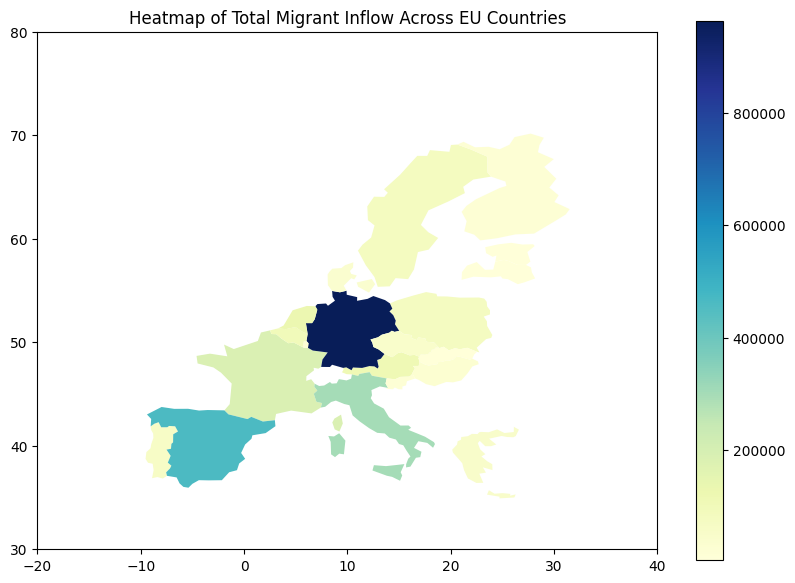

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Selecting only the 'Country' and 'Total Migration' columns
country_total_migration = per_country_avg_df[['Country', 'Average Inflow']]

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge with total_migration_by_country DataFrame
world = world.merge(country_total_migration, how='left', left_on='name', right_on='Country')
# Plot the map
world.plot(column='Average Inflow', cmap='YlGnBu', legend=True, figsize=(10, 7))
plt.xlim(-20, 40)  # Set the x-axis limits
plt.ylim(30, 80)
plt.title('Heatmap of Total Migrant Inflow Across EU Countries')
plt.savefig(f'resources/generated-charts/heat-map-inflow.png')

##### Outflow of Immigrants from EU

In [15]:
europe_map = folium.Map(location=europe_center, zoom_start=4)

folium.Choropleth(
    geo_data='data/world.geojson',
    data=per_country_avg_df,
    columns=['Country', 'Average Outflow'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Outflow Population',
).add_to(europe_map)

europe_map

In [16]:
per_country_avg_df

Country  Average Inflow  Average Outflow
7       Germany   963220.565217    661710.565217
18        Spain   464534.130435    234400.666667
10        Italy   303189.173913     32821.695652
6        France   187023.130435     33176.285714
13  Netherlands   128469.000000     70303.956522
0       Austria   116029.086957     68841.304348
1       Belgium   100669.391304     48905.000000
19       Sweden    80870.217391     21208.086957
14       Poland    77097.391304     57331.857143
15     Portugal    62391.826087      1328.684211
8        Greece    50195.444444     46771.357143
2       Czechia    46527.478261     18184.173913
3       Denmark    35941.782609     27506.521739
9       Hungary    29822.956522     13171.826087
5       Finland    19206.347826      4593.956522
17     Slovenia    18697.125000      8152.043478
12   Luxembourg    17906.173913      9306.217391
4       Estonia     5070.421053      2289.526316
16     Slovakia     4188.608696       591.800000
11       Latvia     4100.684211      3528.166667

C:\Users\Don Veets\AppData\Local\Temp\ipykernel_25576\1136424950.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



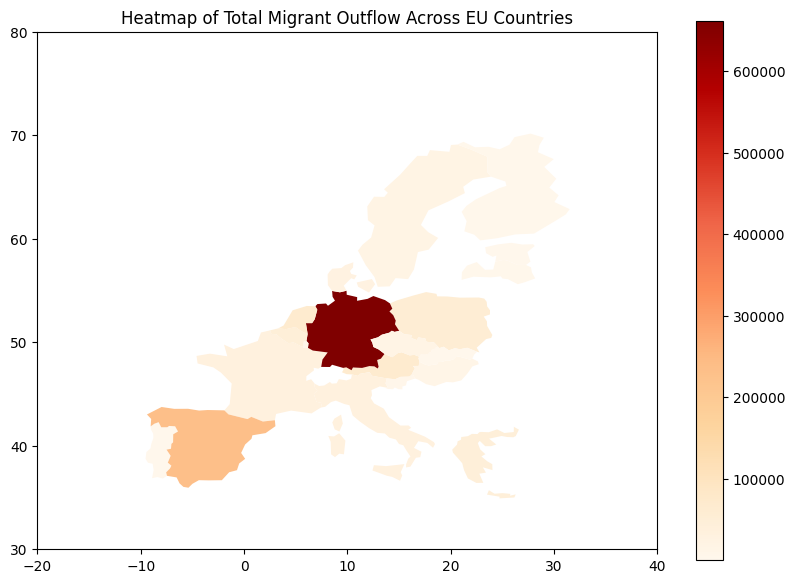

In [17]:
country_total_migration = per_country_avg_df[['Country', 'Average Outflow']]

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge with total_migration_by_country DataFrame
world = world.merge(country_total_migration, how='left', left_on='name', right_on='Country')
# Plot the map
world.plot(column='Average Outflow', cmap='OrRd', legend=True, figsize=(10, 7))
plt.xlim(-20, 40)  # Set the x-axis limits
plt.ylim(30, 80)
plt.title('Heatmap of Total Migrant Outflow Across EU Countries')
plt.savefig(f'resources/generated-charts/heat-map-outflow.png')

### Part 4: Forecasting of Future Population

Several forecasting methods were tried including ARIMA, RandomForestRegressor, VAR, and Linear Regression

#### Forecasting with Random Forest Regressor

In [18]:
population_df.interpolate(method='polynomial', order = 1, inplace=True)

C:\Users\Don Veets\AppData\Local\Temp\ipykernel_25576\3937673305.py:1: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [19]:
number_of_prediction_years = 15
pivot_population_df = population_df.pivot(index='Year', columns='Country', values='Inflow Population')

start = pivot_population_df.index.astype(int).max() + 1
end = pivot_population_df.index.astype(int).max() + number_of_prediction_years
print(f'Start Year of Forecasts {start}')
print(f'Number of prediction years: {number_of_prediction_years}')
print(f'End Year of Forecasts {end}')
combined_df = pivot_population_df

for year in range(start, end):
    X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(combined_df.index.astype(int)), combined_df, test_size=0.6, random_state=190000)
    model = RandomForestRegressor(n_estimators=100, random_state=190000)
    model.fit(X_train, y_train)

    future_years = [year]
    future_df = pd.DataFrame({'Year': future_years})
    future_predictions = model.predict(future_df)
    future_predictions_df = pd.DataFrame(future_predictions, columns=combined_df.columns, index=future_years)
    combined_df = pd.concat([combined_df, future_predictions_df])

f:\docs\masters\internship\dusatu\population-project\venv\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



Start Year of Forecasts 2023
Number of prediction years: 15
End Year of Forecasts 2037


f:\docs\masters\internship\dusatu\population-project\venv\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

f:\docs\masters\internship\dusatu\population-project\venv\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

f:\docs\masters\internship\dusatu\population-project\venv\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

f:\docs\masters\internship\dusatu\population-project\venv\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

f:\docs\masters\internship\dusatu\population-project\venv\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

f:\docs\masters\internship\dusatu\popula

In [20]:
selected_country = 'Poland'
values = combined_df[selected_country].astype(int).tail(number_of_prediction_years).values

forecast = {
    'Year': [year for year in range(start -1, end)],
    'Forecast': values,
    'Upper Limit': values * 1.1,
    'Lower Limit': values * 0.9
}
forecast
forecast_df = pd.DataFrame(forecast)
forecast_df.set_index('Year', inplace= True)

In [21]:
selected_data = combined_df[selected_country].head(len(combined_df) - number_of_prediction_years + 1).astype(int)

data_trace = go.Scatter(
            x=selected_data.index,
            y=selected_data.values,
            mode='lines',  
            name='Inflow',
            line=dict(color='green')
        )

forecast_trace = go.Scatter(
            x=forecast_df.index,
            y=forecast_df['Forecast'],
            mode='lines',  
            name='Inflow',
            line=dict(color='green'),
            showlegend=False
        )

upper_forecast = go.Scatter(
        name='Upper Bound',
        x=forecast_df.index,
        y=forecast_df['Upper Limit'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    )

lower_forecast = go.Scatter(
        name='Lower Bound',
        x=forecast_df.index,
        y=forecast_df['Lower Limit'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(144,238,144,0.4)',
        fill='tonexty',
        showlegend=False
    )

layout = go.Layout(
    title=f'{selected_country}',  # Title of the chart
    xaxis=dict(title='Year'),  # Label for the x-axis
    yaxis=dict(title='Population Change'), 
    height = 750,
)

fig = go.Figure(data=[data_trace, forecast_trace, upper_forecast, lower_forecast], layout = layout)

fig.show()


#### Forecasting with Linear Regression

In [22]:
years_to_predict = range(start, end)
forecasts = {}
for country, group in population_df.groupby('Country'):
    X = group[['Year']]
    y = group['Inflow Population']
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict future values
    future_years = pd.DataFrame({'Year': years_to_predict})
    future_population = model.predict(future_years)
    forecasts[country] = future_population

inflow_forecast_df = pd.DataFrame(forecasts, index=years_to_predict)
inflow_forecast_df['Total'] = inflow_forecast_df.sum(axis=1)
inflow_forecast_df.head(5)

Austria        Belgium       Czechia       Denmark      Estonia  \
2023  159310.976285  134215.000000  55577.956522  53875.249012  6904.762846   
2024  162917.800395  137010.467391  56332.163043  55369.704545  6901.346344   
2025  166524.624506  139805.934783  57086.369565  56864.160079  6897.929842   
2026  170131.448617  142601.402174  57840.576087  58358.615613  6894.513340   
2027  173738.272727  145396.869565  58594.782609  59853.071146  6891.096838   

           Finland         France       Germany        Greece       Hungary  \
2023  29568.335968  274916.371542  1.489550e+06 -34941.899209  46716.916996   
2024  30431.834980  282240.808300  1.533411e+06 -47099.042984  48124.747036   
2025  31295.333992  289565.245059  1.577272e+06 -59256.186759  49532.577075   
2026  32158.833004  296889.681818  1.621133e+06 -71413.330534  50940.407115   
2027  33022.332016  304214.118577  1.664993e+06 -83570.474308  52348.237154   

      ...        Latvia    Luxembourg    Netherlands         Poland  \
2023  ... -10219.904150  26060.245059  210887.371542  176188.482213   
2024  ... -12526.762105  26739.750988  217755.569170  184446.073123   
2025  ... -14833.620059  27419.256917  224623.766798  192703.664032   
2026  ... -17140.478014  28098.762846  231491.964427  200961.254941   
2027  ... -19447.335968  28778.268775  238360.162055  209218.845850   

           Portugal     Slovakia       Slovenia          Spain         Sweden  \
2023   91062.292490  1874.660079  -58322.598814  413526.422925  112524.272727   
2024   93451.498024  1681.831028  -71092.116107  409275.780632  115162.110672   
2025   95840.703557  1489.001976  -83861.633399  405025.138340  117799.948617   
2026   98229.909091  1296.172925  -96631.150692  400774.496047  120437.786561   
2027  100619.114625  1103.343874 -109400.667984  396523.853755  123075.624506   

             Total  
2023  3.452564e+06  
2024  3.501332e+06  
2025  3.550100e+06  
2026  3.598868e+06  
2027  3.647635e+06  

[5 rows x 21 columns]

In [23]:
years_to_predict = range(start, end)
forecasts = {}
for country, group in population_df.groupby('Country'):
    X = group[['Year']]
    y = group['Outflow Population']
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict future values
    future_years = pd.DataFrame({'Year': years_to_predict})
    future_population = model.predict(future_years)
    forecasts[country] = future_population

outflow_forecast_df = pd.DataFrame(forecasts, index=years_to_predict)
outflow_forecast_df['Total'] = outflow_forecast_df.sum(axis=1)
outflow_forecast_df.head(5)

Austria       Belgium       Czechia       Denmark      Estonia  \
2023   95933.972332  65438.652174  16010.051383  44459.960474  2818.055336   
2024   98191.694664  66816.456522  15828.874506  45872.747036  2767.110672   
2025  100449.416996  68194.260870  15647.697628  47285.533597  2716.166008   
2026  102707.139328  69572.065217  15466.520751  48698.320158  2665.221344   
2027  104964.861660  70949.869565  15285.343874  50111.106719  2614.276680   

          Finland         France        Germany        Greece       Hungary  \
2023  7057.549407  -47650.992095  908048.213439 -26840.268775  35005.837945   
2024  7262.848814  -61721.576581  928576.350791 -39865.776680  36825.338933   
2025  7468.148221  -75792.161067  949104.488142 -52891.284585  38644.839921   
2026  7673.447628  -89862.745553  969632.625494 -65916.792490  40464.340909   
2027  7878.747036 -103933.330040  990160.762846 -78942.300395  42283.841897   

      ...       Latvia    Luxembourg    Netherlands        Poland  \
2023  ...  2198.769763  12748.260870  117182.098814  75935.819763   
2024  ...  1819.528656  13035.097826  121088.610672  78898.809634   
2025  ...  1440.287549  13321.934783  124995.122530  81861.799506   
2026  ...  1061.046443  13608.771739  128901.634387  84824.789377   
2027  ...   681.805336  13895.608696  132808.146245  87787.779249   

         Portugal     Slovakia      Slovenia          Spain        Sweden  \
2023  1593.826877  -723.628458  11827.387352  374286.474308  28446.209486   
2024  1487.329842  -845.925395  12133.666008  387586.801877  29049.386364   
2025  1380.832806  -968.222332  12439.944664  400887.129447  29652.563241   
2026  1274.335771 -1090.519269  12746.223320  414187.457016  30255.740119   
2027  1167.838735 -1212.816206  13052.501976  427487.784585  30858.916996   

             Total  
2023  1.785260e+06  
2024  1.808680e+06  
2025  1.832099e+06  
2026  1.855519e+06  
2027  1.878939e+06  

[5 rows x 21 columns]

In [24]:
inflow_temp_df = pd.DataFrame({
    'Year': inflow_forecast_df.index,
    'Total Inflow': inflow_forecast_df['Total'],
    'Upper Limit': inflow_forecast_df['Total'] * 1.1,
    'Lower Limit': inflow_forecast_df['Total'] * 0.9
})
inflow_forecast_combined_df = pd.concat([totals_df[['Year', 'Total Inflow']], inflow_temp_df])
inflow_forecast_combined_df.reset_index(drop = True, inplace = True)

outflow_temp_df = pd.DataFrame({
    'Year': outflow_forecast_df.index,
    'Total Outflow': outflow_forecast_df['Total'],
    'Upper Limit': outflow_forecast_df['Total'] * 1.1,
    'Lower Limit': outflow_forecast_df['Total'] * 0.9
})
outflow_forecast_combined_df = pd.concat([totals_df[['Year', 'Total Outflow']], outflow_temp_df])
outflow_forecast_combined_df.reset_index(drop = True, inplace = True)
outflow_forecast_combined_df

Year  Total Outflow   Upper Limit   Lower Limit
0   2000   7.149680e+05           NaN           NaN
1   2001   6.836190e+05           NaN           NaN
2   2002   7.159120e+05           NaN           NaN
3   2003   7.321940e+05           NaN           NaN
4   2004   8.292380e+05           NaN           NaN
5   2005   7.590220e+05           NaN           NaN
6   2006   8.627060e+05           NaN           NaN
7   2007   9.243230e+05           NaN           NaN
8   2008   1.071121e+06           NaN           NaN
9   2009   1.317450e+06           NaN           NaN
10  2010   1.285067e+06           NaN           NaN
11  2011   1.332198e+06           NaN           NaN
12  2012   1.500205e+06           NaN           NaN
13  2013   1.650398e+06           NaN           NaN
14  2014   1.635548e+06           NaN           NaN
15  2015   1.690274e+06           NaN           NaN
16  2016   1.864526e+06           NaN           NaN
17  2017   1.695210e+06           NaN           NaN
18  2018   1.716967e+06           NaN           NaN
19  2019   1.771634e+06           NaN           NaN
20  2020   1.521491e+06           NaN           NaN
21  2021   1.670697e+06           NaN           NaN
22  2022   1.670702e+06           NaN           NaN
23  2023   1.785260e+06  1.963786e+06  1.606734e+06
24  2024   1.808680e+06  1.989548e+06  1.627812e+06
25  2025   1.832099e+06  2.015309e+06  1.648889e+06
26  2026   1.855519e+06  2.041071e+06  1.669967e+06
27  2027   1.878939e+06  2.066833e+06  1.691045e+06
28  2028   1.902358e+06  2.092594e+06  1.712123e+06
29  2029   1.925778e+06  2.118356e+06  1.733200e+06
30  2030   1.949198e+06  2.144117e+06  1.754278e+06
31  2031   1.972617e+06  2.169879e+06  1.775356e+06
32  2032   1.996037e+06  2.195641e+06  1.796433e+06
33  2033   2.019457e+06  2.221402e+06  1.817511e+06
34  2034   2.042876e+06  2.247164e+06  1.838589e+06
35  2035   2.066296e+06  2.272925e+06  1.859666e+06
36  2036   2.089715e+06  2.298687e+06  1.880744e+06

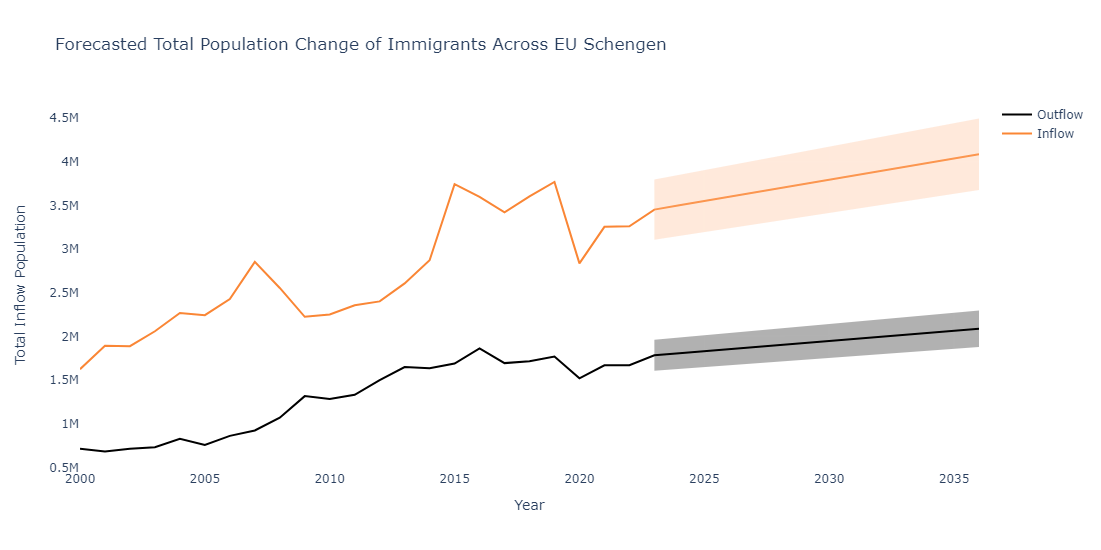

In [25]:
inflow_trace = go.Scatter(
    x=inflow_forecast_combined_df['Year'],
    y=inflow_forecast_combined_df['Total Inflow'],
    mode='lines',  
    name='Inflow',
    line=dict(color='#fa8635')
)

inflow_upper_forecast = go.Scatter(
        name='Upper Bound',
        x=inflow_forecast_combined_df['Year'],
        y=inflow_forecast_combined_df['Upper Limit'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    )

inflow_lower_forecast = go.Scatter(
        name='Lower Bound',
        x=inflow_forecast_combined_df['Year'],
        y=inflow_forecast_combined_df['Lower Limit'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(255, 187, 139, 0.3)',
        fill='tonexty',
        showlegend=False
    )

outflow_trace = go.Scatter(
    x=outflow_forecast_combined_df['Year'],
    y=outflow_forecast_combined_df['Total Outflow'],
    mode='lines',  
    name='Outflow',
    line=dict(color='#000000')
)

outflow_upper_forecast = go.Scatter(
        name='Upper Bound',
        x=outflow_forecast_combined_df['Year'],
        y=outflow_forecast_combined_df['Upper Limit'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    )

outflow_lower_forecast = go.Scatter(
        name='Lower Bound',
        x=outflow_forecast_combined_df['Year'],
        y=outflow_forecast_combined_df['Lower Limit'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(0, 0, 0, 0.3)',
        fill='tonexty',
        showlegend=False
    )

layout = go.Layout(
    title='Forecasted Total Population Change of Immigrants Across EU Schengen',  
    xaxis=dict(title='Year'), 
    yaxis=dict(title='Total Inflow Population'),  
    height = 550,
    plot_bgcolor='rgba(0,0,0,0)',  
    paper_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure(data=[inflow_trace, inflow_upper_forecast, inflow_lower_forecast, outflow_trace, outflow_upper_forecast, outflow_lower_forecast], layout=layout)
pio.write_image(fig, f'resources/generated-charts/line-chart-forecast.png')
fig

### Part 5: Report Generation

In [26]:
pdf = FPDF()
pdf.add_page()

# First Page

#Header
pdf.set_font("Courier", 'B', 12)
pdf.cell(0, 10, 'Immigration Data', 0, 1, 'C')
pdf.set_fill_color(250, 134, 53)
pdf.rect(x=0, y=0, w=210, h=57, style='F')
pdf.image(f'resources/assets/logo.png', x=0, y=0, w=57, h=57)
pdf.set_font("Courier", size=32)
pdf.set_text_color(255, 255, 255)  # Set text color to white
pdf.text(x=55, y=35, txt="Data analytics report")

#Bar Chart
img_w = 11.5*10
img_h = 13*10
img_x = (pdf.w - img_w) / 2
img_y = ((pdf.h - img_h) / 2) - 25
pdf.image(f'resources/generated-charts/bar-chart-average-change.png', x=img_x, y=img_y, w=img_w, h=img_h)

#Bar Chart Header
pdf.set_fill_color(0, 0, 0)
# Set text color (white)

pdf.rect(0, 57, pdf.w, 12, 'F')
# Set font and size for the text
pdf.set_font("Courier", size=12)
# Set text color for the text inside the box (black)
pdf.set_text_color(255, 255, 255)
# Add the text inside the box
text = "Average Change in Population Across EU"
pdf.text(pdf.w/2 - 42, 64, text)

img_w = 11.5*10
img_h = 13*10 -5
img_x = (pdf.w - img_w) + 5
img_y = ((pdf.h - img_h)) + 15
pdf.image(f'resources/generated-charts/heat-map-outflow.png', x=img_x, y=img_y, w=img_w, h=img_h)

img_w = 11.5*10
img_h = 13*10 - 5
img_x = -7.5
img_y = ((pdf.h - img_h)) +15
pdf.image(f'resources/generated-charts/heat-map-inflow.png', x=img_x, y=img_y, w=img_w, h=img_h)



# Draw a rectangle to create the box
pdf.rect(0, 187, pdf.w, 12, 'F')
# Set font and size for the text
pdf.set_font("Courier", size=12)
# Set text color for the text inside the box (black)
pdf.set_text_color(255, 255, 255)
# Add the text inside the box
text = "Heat Map"
pdf.text(pdf.w/2 - 17, 193, text)



used_countries = ['Austria', 'Belgium', 'Czechia', 
                  'Denmark', 'Estonia', 'Finland', 
                  'France', 'Germany', 'Greece', 
                  'Hungary', 'Italy', 'Latvia', 
                  'Luxembourg', 'Netherlands', 
                  'Poland', 'Portugal', 'Slovakia',
                  'Slovenia', 'Spain', 'Sweden']

# Time Series Pages    
for i in range(1,5):
    selected = used_countries[(i-1)*6:((i-1)*6) + 6]
    pdf.add_page()
    
    #Header
    pdf.set_font("Courier", size = 12)
    pdf.cell(0, 10, 'Immigration Data', 0, 1, 'C')
    pdf.set_fill_color(250, 134, 53)
    pdf.rect(x=0, y=0, w=210, h=18, style='F')
    pdf.set_font("Courier", size=18)
    pdf.set_text_color(255, 255, 255)  # Set text color to white
    pdf.text(x=12, y=9, txt="Population change across each EU country")
    
    # Image size and spacing
    img_width = 80
    img_height = 80
    spacing = 10
    
    # Position variables
    x = 15
    y = 15
    # Loop through images
    for country in selected:
        img_path = f'resources/generated-charts/line-chart-inflow-{country}.png'
        pdf.image(img_path, x, y, img_width, img_height)
        pdf.set_fill_color(0,0,0)
        pdf.rect(x=x, y=y + 5, w=25, h=7, style='F')
        pdf.set_font("Courier", 'B', 10)
        pdf.set_text_color(255, 255, 255)
        pdf.text(x + 2, y + 9, country)
        # Move to the next position
        x += img_width + spacing
        
        # If reached the end of the row, move to the next row
        if x > pdf.w - img_width - spacing:
            x = 10
            y += img_height + spacing




#Time Series Line Chart
img_w = 11.5*10*1.4
img_h = 13*10*1.4
img_x = (pdf.w - img_w) / 2
img_y = ((pdf.h - img_h) / 2) + 35
pdf.image(f'resources/generated-charts/line-chart-inflow-total.png', x=img_x, y=img_y, w=img_w, h=img_h)

pdf.set_fill_color(0, 0, 0)
# Set text color (white)

# Draw a rectangle to create the box
pdf.rect(0, 100, pdf.w, 12, 'F')
# Set font and size for the text
pdf.set_font("Arial", size=12)
# Set text color for the text inside the box (black)
pdf.set_text_color(255, 255, 255)
# Add the text inside the box
text = "Time Series Analysis of Total Inflow/Outflow of EU Countries"
pdf.text(pdf.w/2- 60, 106, text)


events = {
    '2020': 'The main factor affecting immigration into the European Union (EU) in 2020 was the global COVID-19 pandemic. With widespread travel restrictions and border closures aimed at curbing the virus, international migration slowed significantly. Many individuals postponed or canceled plans to move to EU countries for work, study, or family reasons due to health concerns and travel limitations. Economic uncertainties resulting from the pandemic, such as job losses, also contributed to the decline in immigration. Overall, the pandemic led to a notable reduction in immigrant inflow to the EU compared to previous years.',
    '2015':'The major event in 2015 that affected immigrant inflow across the European Union (EU) was the European migrant crisis. This crisis was characterized by a significant influx of refugees and migrants, primarily from war-torn countries in the Middle East and North Africa, seeking asylum and better living conditions in EU member states. The crisis led to heightened tensions, debates over immigration policies, and the implementation of various measures by EU countries to manage the influx of migrants.',
    '2007':'In 2007, the major event affecting immigrant inflow across the European Union (EU) was the enlargement of the EU to include Bulgaria and Romania. This enlargement led to an increase in migration flows from these countries to other EU member states, as citizens of Bulgaria and Romania gained the right to freely move and work within the EU. The accession of these countries prompted discussions and debates within the EU regarding immigration policies and the management of migration from newer member states.',
    '2021':'In 2021, one significant event that increased immigrant inflow across the European Union (EU) was the Taliban\'s takeover of Afghanistan. This led to a surge in Afghan refugees seeking asylum in EU member states, particularly those involved in military operations in Afghanistan. The humanitarian crisis sparked by the Taliban\'s resurgence prompted discussions among EU countries regarding refugee resettlement and asylum policies, resulting in an increase in immigrant arrivals to the EU.',
    '2009':'In 2009, a major event that decreased immigrant inflow across the European Union (EU) was the global financial crisis. The economic downturn resulted in decreased job opportunities and heightened unemployment rates in many EU countries, leading to a decline in labor migration. Additionally, stricter immigration policies were implemented by some EU member states in response to the economic crisis, making it more challenging for immigrants to enter and find work in the EU.'
}


# Event Summary Page
pdf.add_page()
pdf.set_font("Courier", size = 12)
pdf.cell(0, 10, 'Immigration Data', 0, 1, 'C')
pdf.set_fill_color(250, 134, 53)
pdf.rect(x=0, y=0, w=210, h=18, style='F')
pdf.set_font("Courier", size=18)
pdf.set_text_color(255, 255, 255)  # Set text color to white
pdf.text(x=12, y=9, txt="Key Events")

pdf.set_fill_color(0, 0, 0)
# Set text color (white)

pdf.rect(0, 18, pdf.w, 20, 'F')
# Set font and size for the text
pdf.set_font("Courier", size=12)
# Set text color for the text inside the box (black)
pdf.set_text_color(255, 255, 255)
# Add the text inside the box
text = "Based on the analysis of population inflow acrss 2000-2022, it was determined that the years with the highest population spike/dip are:"
pdf.multi_cell(pdf.w - 12.5, 5, txt=text)

items = 0

for year, event in events.items():

    pdf.set_fill_color(0,0,0)
    pdf.rect(x=13, y= 44 + items*46, w=25, h=7, style='F')
    pdf.set_font("Courier", 'B', 10)
    pdf.set_text_color(255, 255, 255)
    pdf.text(15, 47.5 + items*46, year)

    pdf.set_font("Times", size=11)
    pdf.set_text_color(0, 0, 0)
    pdf.set_xy(10, 51.5 + items*46)
    pdf.multi_cell(pdf.w - 12.5, 6, txt=event)
    items += 1


# Forecast Page
pdf.add_page()
pdf.set_font("Courier", size = 12)
pdf.cell(0, 10, 'Immigration Data', 0, 1, 'C')
pdf.set_fill_color(250, 134, 53)
pdf.rect(x=0, y=0, w=210, h=18, style='F')
pdf.set_font("Courier", size=18)
pdf.set_text_color(255, 255, 255)  # Set text color to white
pdf.text(x=12, y=9, txt="Forecasting")

context = 'Several forecasting models were examined for the forecasting of future population including ARIMA, SARIMAX, Random Forest Regressor. However, due to the limited amount of data, it was decided that a simple linear regression would be suitable.'
header = 'Regression Model'

pdf.set_fill_color(0,0,0)
pdf.rect(x=12, y=34, w=25, h=7, style='F')
pdf.set_font("Courier", 'B', 10)
pdf.set_text_color(255, 255, 255)
pdf.text(15, 38, header)

pdf.set_text_color(20,0,0)
pdf.set_font("Times", size = 12)
pdf.set_xy(10, 45)
pdf.multi_cell(pdf.w - 12.5, 6, txt=context)

pdf.set_fill_color(0, 0, 0)
# Set text color (white)

#Time Series Line Chart
img_w = 11.5*10*1.6
img_h = 13*10*1.6
img_x = (pdf.w - img_w) / 2
img_y = ((pdf.h - img_h) / 2) + 32
pdf.image(f'resources/generated-charts/line-chart-forecast.png', x=img_x, y=img_y, w=img_w, h=img_h)


# Draw a rectangle to create the box
pdf.rect(0, 85, pdf.w, 12, 'F')
# Set font and size for the text
pdf.set_font("Arial", size=12)
# Set text color for the text inside the box (black)
pdf.set_text_color(255, 255, 255)
# Add the text inside the box
text = "Time Series Analysis with Forecasting"
pdf.text(pdf.w/2- 38, 91, text)

# Save the PDF
pdf_file = "population_change_report.pdf"
pdf.output(pdf_file)
print(f"PDF report generated: {pdf_file}")

PDF report generated: population_change_report.pdf


# Analysis of Stock Population of Foreign and Foreign-born Immigrants Across EU

## Data Source Loading and Cleaning

In [27]:
file = 'Stock of foreign population by nationality.xls'
data1 = pd.read_excel(f'data/converted/{file}')
foreign_population = data1.drop(data1.index[:4])
foreign_population = foreign_population.drop(foreign_population.columns[1], axis = 1)
years = foreign_population.iloc[0]
foreign_population = foreign_population.drop(foreign_population.index[:2])
foreign_population = foreign_population.drop(foreign_population.index[-1])
foreign_population.reset_index(inplace = True, drop = True)
# df.columns.values[1:] = years
years.name = None
foreign_population.columns = years
foreign_population.columns.values[0] = 'Country'
foreign_population.set_index('Country', inplace = True)
foreign_population = foreign_population.iloc[:, 1::2]
years = list(range(2000, 2023))
foreign_population.columns = years
foreign_population.reset_index(inplace=True)
foreign_population.set_index('Country', inplace=True)
foreign_population.insert(0, 'Country', foreign_population.index)# Move the 'Country' column to the first position
foreign_population.reset_index(drop=True, inplace=True)# Drop the original index column
#print(df.columns)
foreign_population.head(10)

Country     2000     2001    2002    2003    2004    2005     2006  \
0  Australia       ..       ..      ..      ..      ..      ..       ..   
1    Austria   693955   701768  730261  746753  754216  774401   796666   
2    Belgium   897110   861685  846734  850077  860287  870862   900473   
3     Canada       ..  1568645      ..      ..      ..      ..  1758870   
4      Chile       ..       ..      ..      ..      ..      ..       ..   
5    Czechia   228862   200951  210794  231608  240421  254294   278312   
6    Denmark   259357   258629  266729  265424  271211  267604   270051   
7    Estonia   291724   287072  273766      ..      ..      ..       ..   
8    Finland    87680    91074   98577  103682  107003  108346   113852   
9     France  3258500       ..      ..      ..      ..      ..  3541820   

      2007     2008  ...     2013     2014     2015     2016     2017  \
0       ..       ..  ...       ..       ..       ..       ..       ..   
1   804779   829679  ...  1004268  1066114  1146078  1267674  1341930   
2   932161   971448  ...  1231292  1241159  1276903  1333243  1353775   
3       ..       ..  ...       ..       ..       ..  2404815       ..   
4       ..       ..  ...       ..       ..       ..       ..   952711   
5   321456   392315  ...   435946   439152   449367   464670   493441   
6   278096   298490  ...   374705   397300   422559   463147   484986   
7       ..       ..  ...   210949   211705   211431   211517   212213   
8   121739   132708  ...   195511   207511   219675   229765   243639   
9  3696874  3731224  ...  4092106  4227226  4431376  4544793  4605669   

      2018     2019     2020     2021     2022  
0       ..       ..       ..       ..       ..  
1  1395880  1438923  1486223  1531072  1586709  
2  1376432  1413750  1478847  1489156  1514863  
3       ..       ..       ..  3185250       ..  
4       ..  1299432  1448391  1460047  1482390  
5   524142   564345   593366   632570   658564  
6   505992   525898   537122   539494   562248  
7   213667   216350   215611   201252   203383  
8   249452   257572   267629   278917   296464  
9  4950717  4995356  5137398  5215225  5315290  

[10 rows x 24 columns]

In [28]:
file = 'Stock of foreign-born population by country of birth.xls'
data = pd.read_excel(f'data/converted/{file}')
#foreign-born population
df_foreign_born = data.drop(data.index[:4])
df_foreign_born = df_foreign_born.drop(df_foreign_born.columns[1], axis = 1)
years = df_foreign_born.iloc[0]
df_foreign_born = df_foreign_born.drop(df_foreign_born.index[:2])
df_foreign_born = df_foreign_born.drop(df_foreign_born.index[-1])
df_foreign_born.reset_index(inplace = True, drop = True)
years.name = None
df_foreign_born.columns = years
df_foreign_born.columns.values[0] = 'Country'
df_foreign_born.set_index('Country', inplace = True)
df_foreign_born = df_foreign_born.iloc[:, 1::2]
years = list(range(2000, 2023))
df_foreign_born.columns = years
df_foreign_born.reset_index(inplace=True)
df_foreign_born.set_index('Country', inplace=True)
df_foreign_born.insert(0, 'Country', df_foreign_born.index)
df_foreign_born.reset_index(drop=True, inplace=True)
df_foreign_born.head(10)


Country     2000     2001     2002     2003     2004     2005     2006  \
0  Australia  4412170  4482120  4534510  4655610  4752950  4877090  5031630   
1    Austria   872000   843000  1112094  1137351  1141212  1154776  1195156   
2    Belgium  1064214  1080790  1117261  1156732  1185456  1220062  1268915   
3     Canada       ..  5448480       ..       ..       ..       ..  6186950   
4      Chile       ..       ..       ..   184464   223000   235545   247365   
5    Czechia       ..   448477       ..       ..       ..       ..       ..   
6    Denmark   296924   308674   321794   331506   337802   343367   350436   
7    Estonia   257065   252686   249496       ..       ..       ..       ..   
8    Finland   131120   136203   145139   152057   158867   166361   176612   
9     France  4306100       ..       ..       ..       ..       ..  6910060   

      2007     2008  ...     2013     2014     2015     2016     2017  \
0  5233250  5477900  ...  6408740  6570240  6729730  6912110  7138610   
1  1215695  1235678  ...  1364771  1414624  1484595  1594723  1656266   
2  1319302  1380323  ...  1724419  1750834  1786080  1849287  1880808   
3       ..       ..  ...       ..       ..       ..  7540830       ..   
4   258829   290901  ...   415540   441529   465319       ..   746435   
5       ..       ..  ...   387337   396156   416454   433290   465056   
6   360902   378665  ...   456386   476059   501057   540503   570581   
7       ..       ..  ...   199047   196925   194730   193859   192561   
8   187910   202528  ...   285471   304279   321977   337162   357541   
9  7017207  7129254  ...  7590945  7715134  7847499  8028227  8098872   

      2018     2019     2020     2021     2022  
0  7332600  7533010  7653600  7502450       ..  
1  1697123  1728554  1765311  1797573  1842426  
2  1920457  1973007  2056415  2079757  2125700  
3       ..       ..       ..  8361505       ..  
4       ..  1299432  1448391  1460047  1482390  
5   467580   507051   533639   570139   453424  
6   591678   607622   614353   617770   640922  
7   196289   198064   199042   198243   201253  
8   372802   387215   404179   420766   442290  
9  8199663  8428660  8521829  8670939  8651109  

[10 rows x 24 columns]

## Data Analysis and Visualization

### Visualizing Migrant Population Stock for each EU country

C:\Users\Don Veets\AppData\Local\Temp\ipykernel_25576\1921307444.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Don Veets\AppData\Local\Temp\ipykernel_25576\1921307444.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



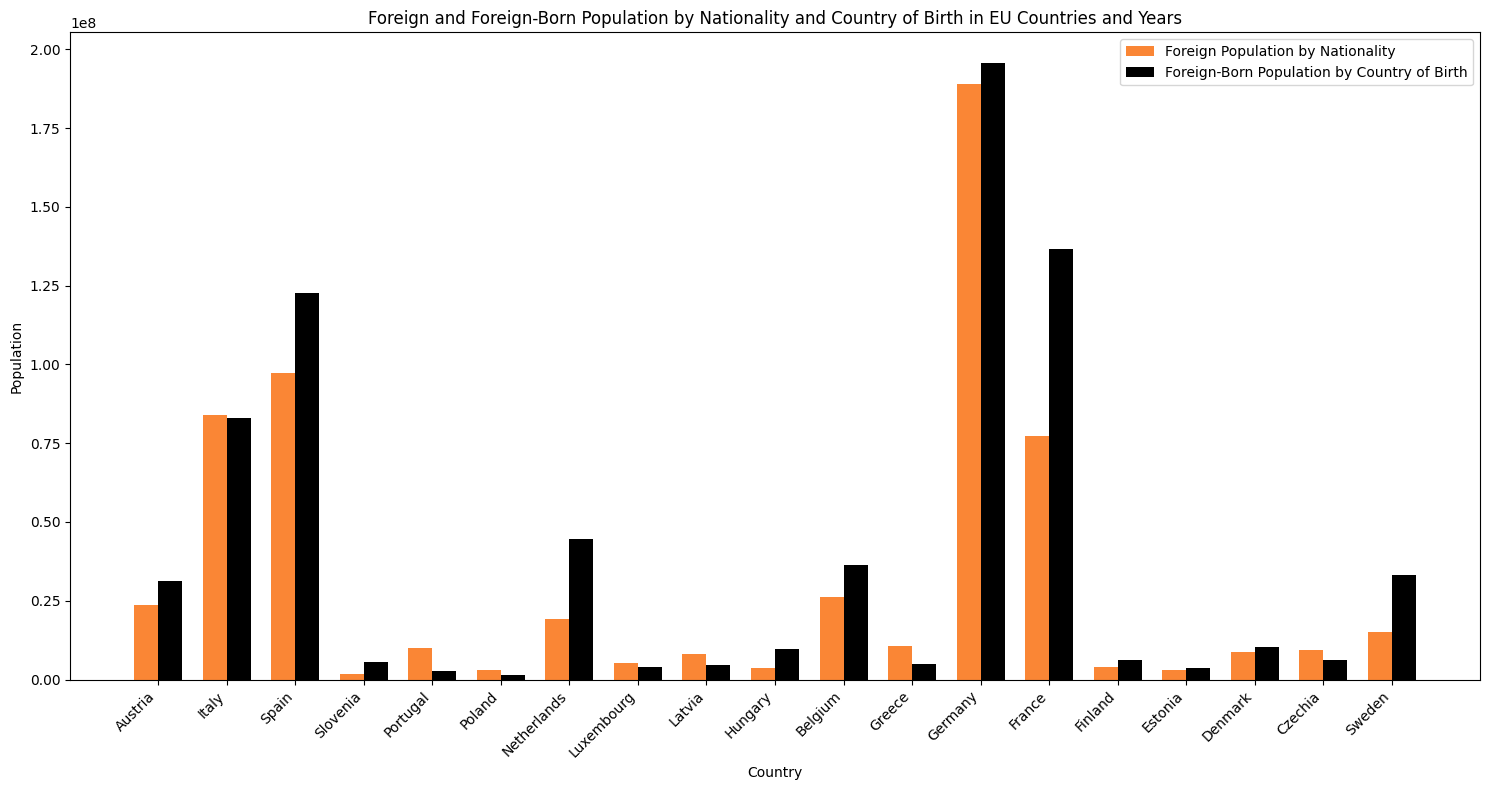

In [29]:
# Assuming you already have the necessary data loaded and processed
eu_countries = ['Austria', 'Belgium', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
eu_foreign_born = df_foreign_born[df_foreign_born['Country'].isin(eu_countries)]
eu_foreign_population = foreign_population[foreign_population['Country'].isin(eu_countries)]

# Combine the dataframes
combined_df = pd.concat([eu_foreign_population, eu_foreign_born])

# Set up figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Define bar width
bar_width = 0.35

# Sort the countries based on total migration
total_migration_by_country = combined_df.groupby('Country').apply(lambda x: x.select_dtypes(include=['number']).fillna(0).sum()).sum(axis=1)
sorted_countries = total_migration_by_country.sort_values(ascending=False).index

# Generate x positions for each group of bars
x = np.arange(len(sorted_countries))

# Plot the foreign population by nationality
bar_color1 = '#fa8635'
numeric_columns = eu_foreign_population.columns.drop(['Country'])
eu_foreign_population[numeric_columns] = eu_foreign_population[numeric_columns].apply(pd.to_numeric, errors='coerce')
ax.bar(x - bar_width/2, eu_foreign_population[eu_foreign_population['Country'].isin(sorted_countries)].groupby('Country').apply(lambda x: x.select_dtypes(include=['number']).fillna(0).sum()).sum(axis=1).reindex(sorted_countries), label='Foreign Population by Nationality', width=bar_width, color=bar_color1)

# Plot the foreign-born population by country of birth
bar_color2 = 'black'
numeric_columns = eu_foreign_born.columns.drop(['Country'])
eu_foreign_born[numeric_columns] = eu_foreign_born[numeric_columns].apply(pd.to_numeric, errors='coerce')
ax.bar(x + bar_width/2, eu_foreign_born[eu_foreign_born['Country'].isin(sorted_countries)].groupby('Country').apply(lambda x: x.select_dtypes(include=['number']).fillna(0).sum()).sum(axis=1).reindex(sorted_countries), label='Foreign-Born Population by Country of Birth', width=bar_width, color=bar_color2)

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(sorted_countries, rotation=45, ha='right')

# Set plot title and labels
ax.set_title('Foreign and Foreign-Born Population by Nationality and Country of Birth in EU Countries and Years')
ax.set_xlabel('Country')
ax.set_ylabel('Population')

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.savefig(f'resources/generated-charts/bar-chart-average-change-stock.png', dpi=300)
plt.show()


### Time Series Analysis for foreign population

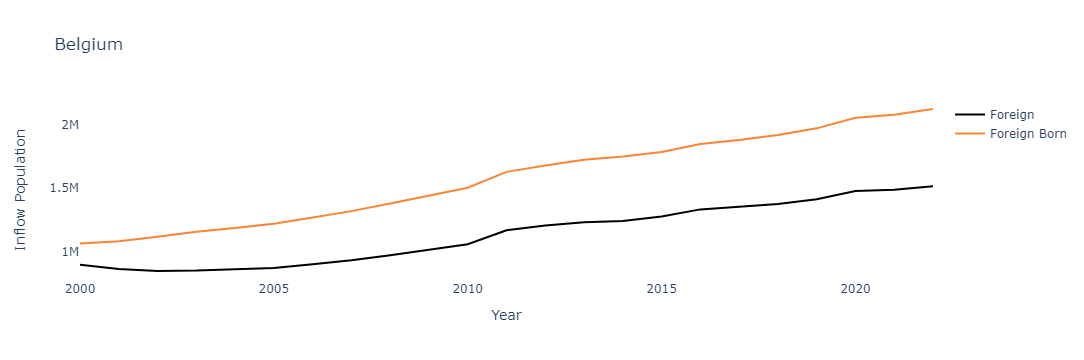

No Available Data for Croatia


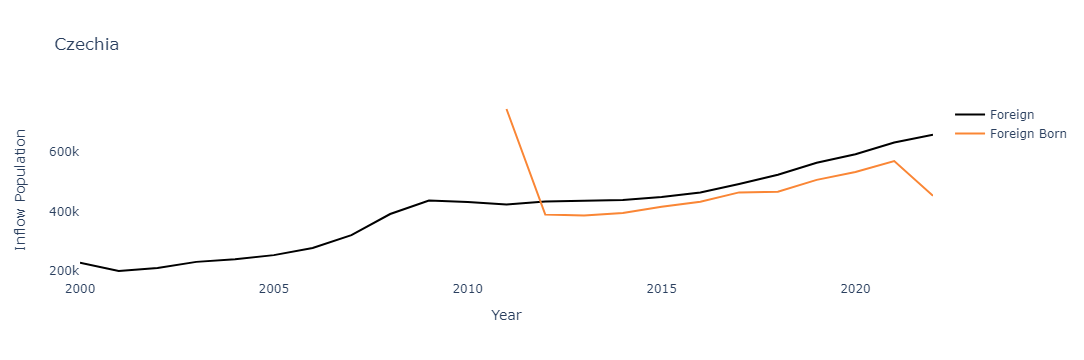

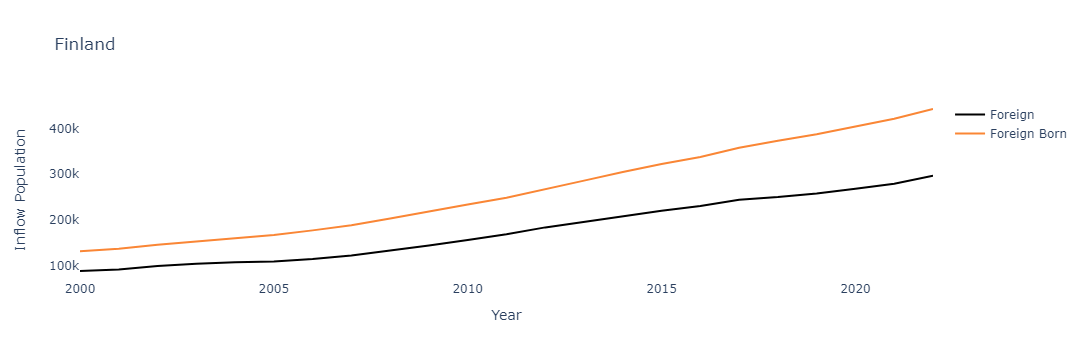

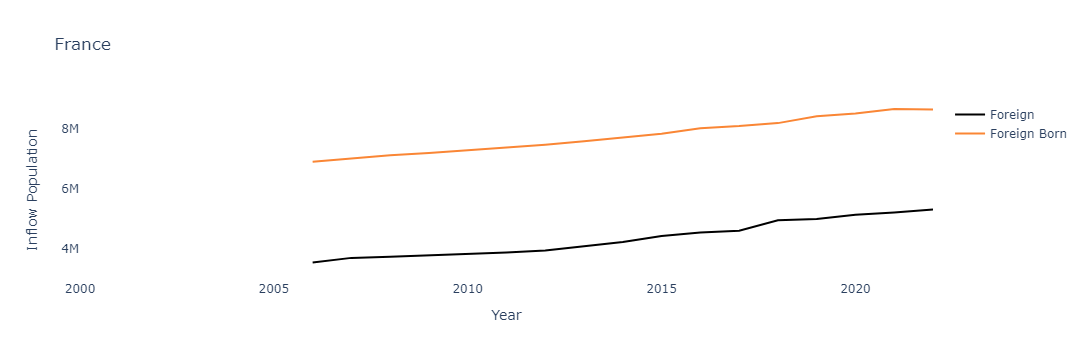

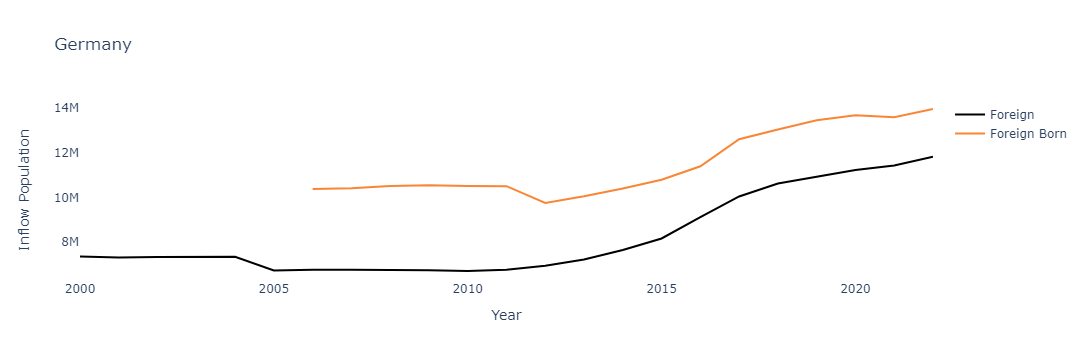

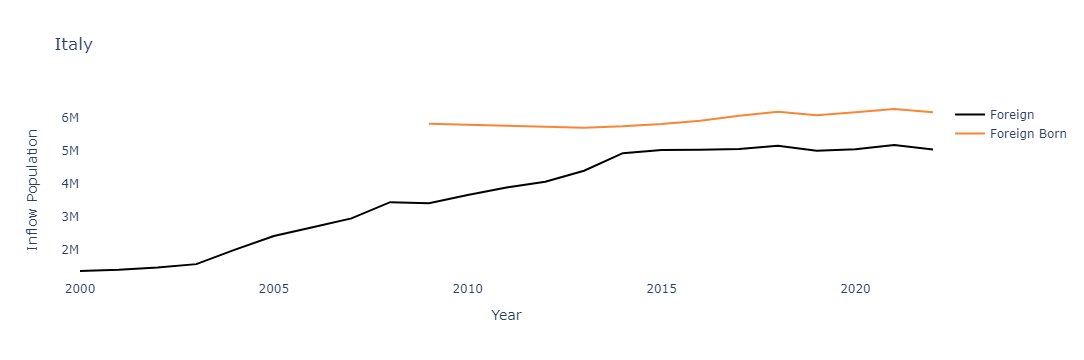

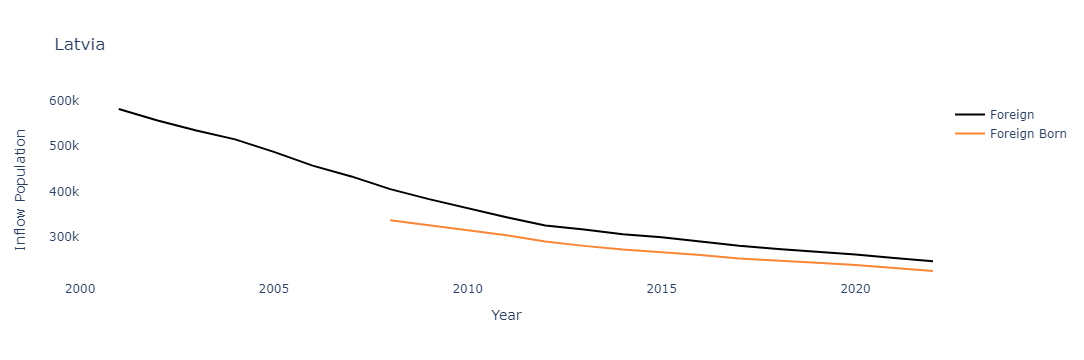

No Available Data for Lithuania


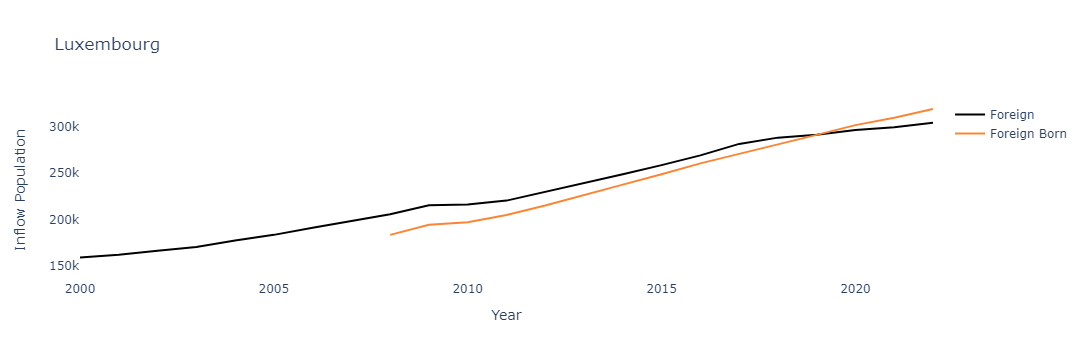

No Available Data for Malta


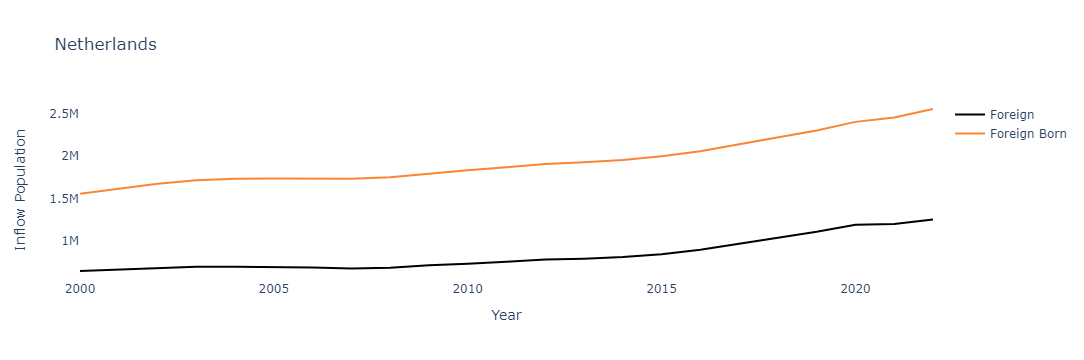

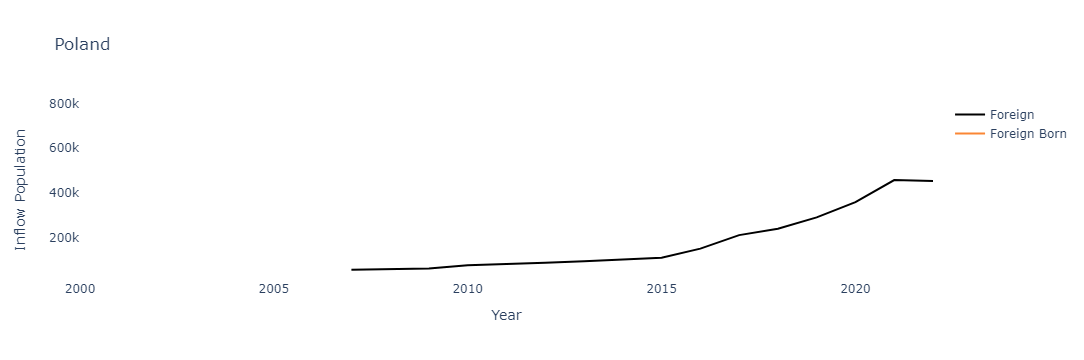

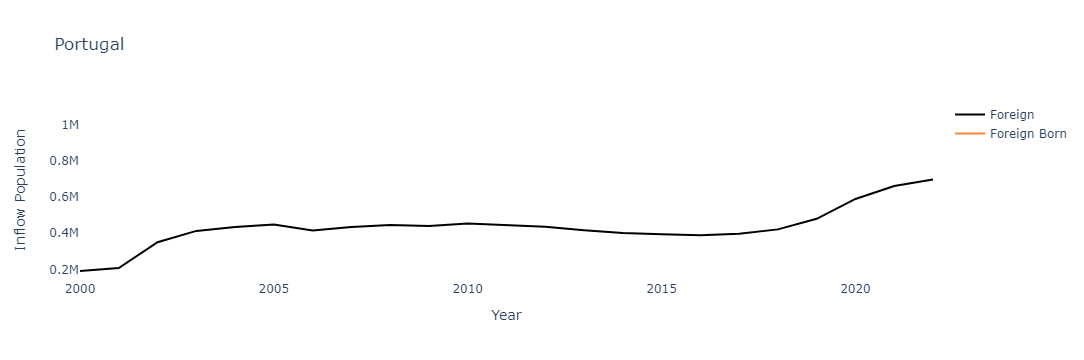

No Available Data for Slovakia


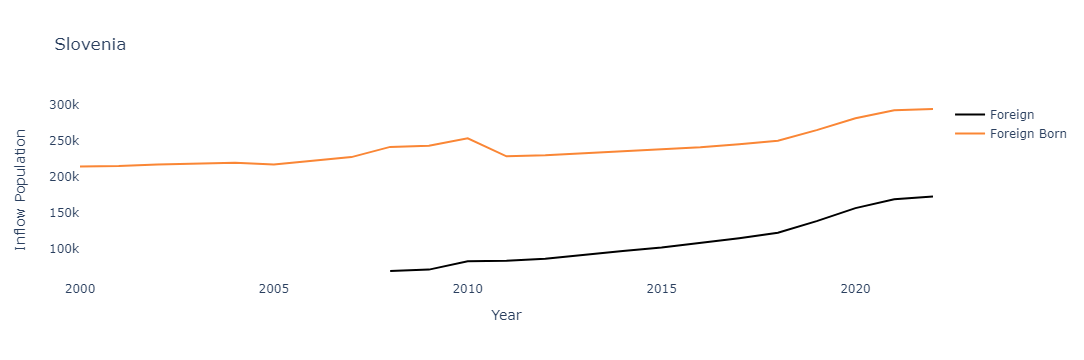

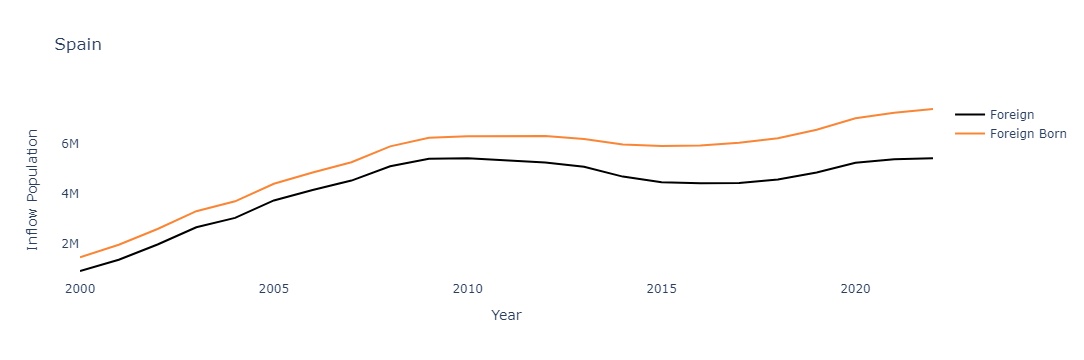

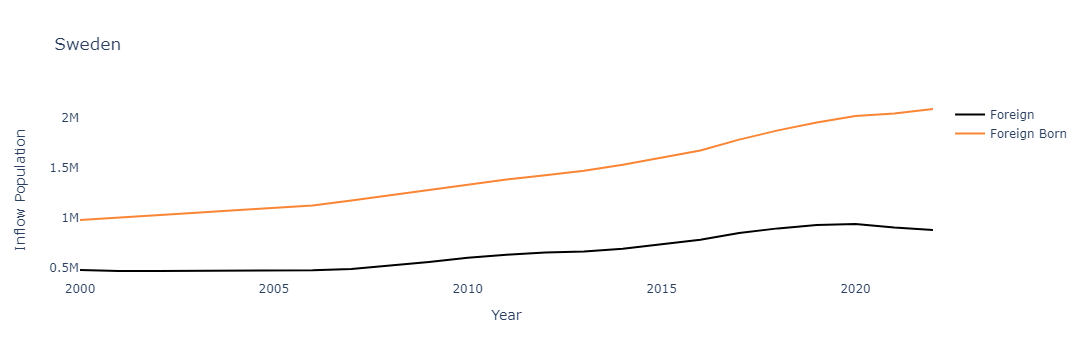

In [30]:


foreign_born_graph_data = eu_foreign_born.set_index('Country')
foreign_population_graph_data = eu_foreign_population.set_index('Country')

for country in eu_countries:
    if country in  eu_foreign_born.values:
        selected_foreign_data = foreign_population_graph_data.loc[country]
        trace = go.Scatter(
            x=selected_foreign_data.index,
            y=selected_foreign_data.values,
            mode='lines',  
            name='Foreign',
            line=dict(color='#000000')
        )

        selected_foreign_born_data = foreign_born_graph_data.loc[country]
        trace2 = go.Scatter(
            x=selected_foreign_born_data.index,
            y=selected_foreign_born_data.values,
            mode='lines',  
            name='Foreign Born',
            line=dict(color='#fa8635')
        )
        layout = go.Layout(
            title=f'{country}',  # Title of the chart
            xaxis=dict(title='Year'),  # Label for the x-axis
            yaxis=dict(title='Inflow Population'),
            plot_bgcolor='rgba(0,0,0,0)',  
            paper_bgcolor='rgba(0,0,0,0)',
            width = 600
        )
        fig = go.Figure(data=[trace, trace2], layout = layout)
        
        pio.write_image(fig, f'resources/generated-charts/line-chart-stock-{country}.png')
        fig.show()
    else:
        print(f'No Available Data for {country}')

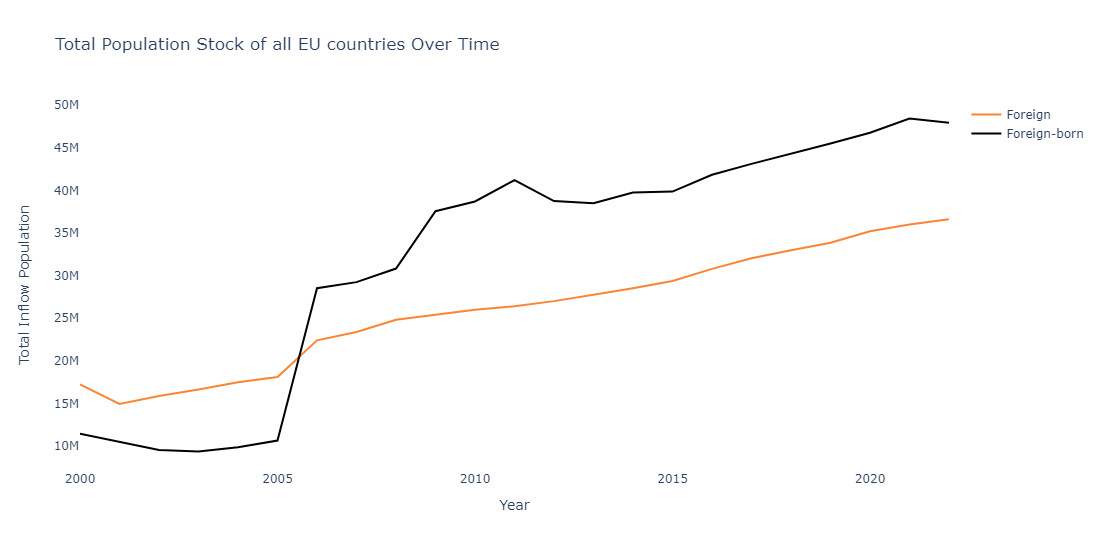

In [31]:
total_foreign_born_data = foreign_born_graph_data.fillna(0).sum().values
total_foreign_data = foreign_population_graph_data.fillna(0).sum().values
trace = go.Scatter(
    x=foreign_born_graph_data.columns,
    y=total_foreign_data,
    mode='lines',  
    name='Foreign',
    line=dict(color='#fa8635')
)

trace2 = go.Scatter(
    x=foreign_born_graph_data.columns,
    y=total_foreign_born_data,
    mode='lines',  
    name='Foreign-born',
    line=dict(color='#000000')
)

layout = go.Layout(
    title='Total Population Stock of all EU countries Over Time',  
    xaxis=dict(title='Year'), 
    yaxis=dict(title='Total Inflow Population'),  
    height = 550,
    plot_bgcolor='rgba(0,0,0,0)',  
    paper_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure(data=[trace, trace2], layout=layout)
pio.write_image(fig, f'resources/generated-charts/line-chart-stock-total.png')
fig

### Spatial Analysis of Immigrant Population 

In [32]:
year_columns = eu_foreign_population.columns[1:]

#### Foreign Population

In [33]:
from folium.plugins import HeatMap
# Initialize a geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Create a map centered around Europe
m = folium.Map(location=[54.5260, 15.2551], zoom_start=4)

total_migration_by_country = eu_foreign_population.groupby('Country')[year_columns].sum().reset_index()

# Perform geocoding for each country in your DataFrame
locations = []
weights = []
for index, row in total_migration_by_country.iterrows():
    country = row['Country']
    migration_data = row[year_columns]
    location = geolocator.geocode(country)
    if location:
        latitude = str(location.latitude)
        longitude = str(location.longitude)
        locations.append([latitude, longitude])
        weights.append(migration_data.sum())

# Convert locations and weights to the correct format
heat_data = [[float(loc[0]), float(loc[1]), weight] for loc, weight in zip(locations, weights)]

# Add heatmap layer to the map
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file or display it
m.save('map_with_heatmap for eu_foreign_population.html')
m

In [34]:
country_total_migration

Country  Average Outflow
7       Germany    661710.565217
18        Spain    234400.666667
10        Italy     32821.695652
6        France     33176.285714
13  Netherlands     70303.956522
0       Austria     68841.304348
1       Belgium     48905.000000
19       Sweden     21208.086957
14       Poland     57331.857143
15     Portugal      1328.684211
8        Greece     46771.357143
2       Czechia     18184.173913
3       Denmark     27506.521739
9       Hungary     13171.826087
5       Finland      4593.956522
17     Slovenia      8152.043478
12   Luxembourg      9306.217391
4       Estonia      2289.526316
16     Slovakia       591.800000
11       Latvia      3528.166667

In [35]:

total_foreign_born = total_migration_by_country.set_index('Country', drop = True).mean(axis = 1)
total_migration_by_country['Average Foreign Pop'] = total_foreign_born.values 
total_migration_by_country

country_total_migration = total_migration_by_country[['Country','Average Foreign Pop']]

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge with total_migration_by_country DataFrame
world = world.merge(country_total_migration, how='left', left_on='name', right_on='Country')
# Plot the map
world.plot(column='Average Foreign Pop', cmap='YlOrRd', legend=True, figsize=(10, 7))
plt.xlim(-20, 40)  # Set the x-axis limits
plt.ylim(30, 80)
plt.title('Heatmap of Total Migrant Foreign Born Stock Population Across EU Countries')
plt.savefig(f'resources/generated-charts/heat-map-foreign.png')

C:\Users\Don Veets\AppData\Local\Temp\ipykernel_25576\2898748148.py:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



#### Foreign Born Population

In [36]:

# Initialize a geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Create a map centered around Europe
m = folium.Map(location=[54.5260, 15.2551], zoom_start=4)

total_migration_by_country = eu_foreign_born.groupby('Country')[year_columns].sum().reset_index()

# Perform geocoding for each country in your DataFrame
locations = []
weights = []
for index, row in total_migration_by_country.iterrows():
    country = row['Country']
    migration_data = row[year_columns]
    location = geolocator.geocode(country)
    if location:
        latitude = str(location.latitude)
        longitude = str(location.longitude)
        locations.append([latitude, longitude])
        weights.append(migration_data.sum())

# Convert locations and weights to the correct format
heat_data = [[float(loc[0]), float(loc[1]), weight] for loc, weight in zip(locations, weights)]

# Add heatmap layer to the map
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file or display it
m.save('map_heatmap foreu_foreign_born .html')
m

C:\Users\Don Veets\AppData\Local\Temp\ipykernel_25576\608842906.py:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



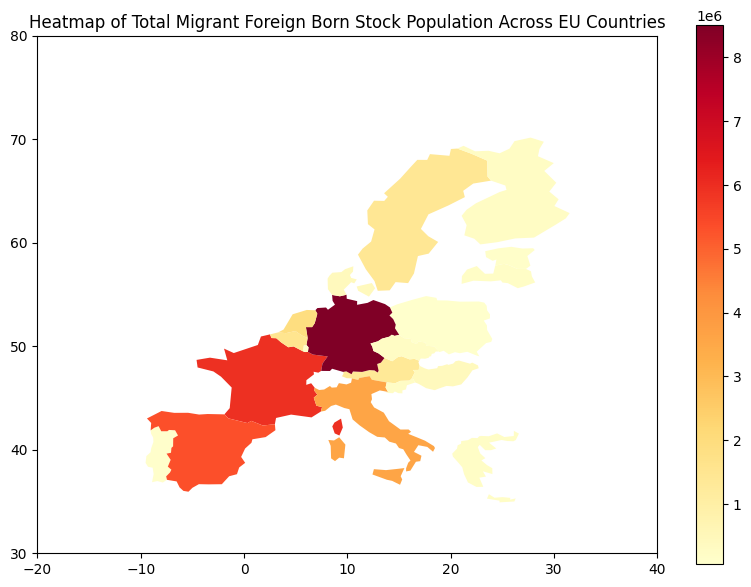

In [37]:
total_foreign = total_migration_by_country.set_index('Country', drop = True).mean(axis = 1)
total_migration_by_country['Average Foreign Born'] = total_foreign.values 
total_migration_by_country

country_total_migration = total_migration_by_country[['Country','Average Foreign Born']]

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge with total_migration_by_country DataFrame
world = world.merge(country_total_migration, how='left', left_on='name', right_on='Country')
# Plot the map
world.plot(column='Average Foreign Born', cmap='YlOrRd', legend=True, figsize=(10, 7))
plt.xlim(-20, 40)  # Set the x-axis limits
plt.ylim(30, 80)
plt.title('Heatmap of Total Migrant Foreign Born Stock Population Across EU Countries')
plt.savefig(f'resources/generated-charts/heat-map-foreign_born.png')

### Forecasting

#### Foreign

In [38]:
from sklearn.linear_model import LinearRegression
year_columns = eu_foreign_population.columns[2:]
forecast_results = []
future_years = np.arange(len(year_columns), len(year_columns) + 5).reshape(-1, 1)
for country in eu_foreign_population['Country'].unique():
    country_data = eu_foreign_population[eu_foreign_population['Country'] == country][year_columns].values[0]
    X = np.arange(len(year_columns)).reshape(-1, 1)  # Include all years for training
    y = country_data
    missing_values = np.isnan(y)
    if np.any(missing_values):
        X = X[~missing_values]
        y = y[~missing_values]
    model = LinearRegression()
    model.fit(X, y)
    forecast = np.round(model.predict(np.concatenate([future_years], axis=1)), 2)
    forecast_results.append({'Country': country, 'Forecast': forecast})

# Convert the list of dictionaries to a DataFrame
forecast_eu_foreign_population = pd.DataFrame(forecast_results)
forecast_eu_foreign_population

Country                                           Forecast
0       Austria  [1555914.61, 1600256.56, 1644598.5, 1688940.45...
1       Belgium  [1562749.26, 1598841.14, 1634933.03, 1671024.9...
2       Czechia  [649498.73, 669952.27, 690405.81, 710859.35, 7...
3       Denmark  [564549.75, 580657.96, 596766.18, 612874.39, 6...
4       Estonia  [190964.16, 187317.56, 183670.96, 180024.37, 1...
5       Finland  [298028.19, 308239.48, 318450.77, 328662.06, 3...
6        France  [5397299.9, 5513996.05, 5630692.2, 5747388.35,...
7       Germany  [10960482.23, 11196070.63, 11431659.03, 116672...
8        Greece  [924002.15, 946314.99, 968627.82, 990940.66, 1...
9       Hungary  [192971.36, 195848.85, 198726.34, 201603.83, 2...
10        Italy  [6048701.01, 6248295.8, 6447890.58, 6647485.36...
11       Latvia  [185625.29, 169487.99, 153350.7, 137213.41, 12...
12   Luxembourg  [316605.12, 323915.62, 331226.12, 338536.62, 3...
13  Netherlands  [1159108.36, 1186153.34, 1213198.31, 1240243.2...
14       Poland  [380474.07, 403202.14, 425930.2, 448658.27, 47...
15     Portugal  [563413.19, 573742.03, 584070.86, 594399.69, 6...
16     Slovenia  [169856.18, 177264.1, 184672.01, 192079.92, 19...
17        Spain  [5830672.0, 5957005.81, 6083339.61, 6209673.42...
18       Sweden  [963822.75, 989861.01, 1015899.27, 1041937.53,...

#### Foreign Born

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Define future years including 2023
future_years_extended = np.arange(len(year_columns), len(year_columns) + 6).reshape(-1, 1)

forecast_results = []

for country in eu_foreign_born['Country'].unique():
    country_data = eu_foreign_born[eu_foreign_born['Country'] == country][year_columns].values[0]
    X = np.arange(len(year_columns)).reshape(-1, 1)  # Include all years for training
    y = country_data
    missing_values = np.isnan(y)
    if np.any(missing_values):
        X = X[~missing_values]
        y = y[~missing_values]
    model = LinearRegression()
    model.fit(X, y)
    forecast = np.round(model.predict(np.concatenate([future_years_extended], axis=1)), 2)
    forecast_results.append({'Country': country, 'Forecast': forecast})

# Convert the list of dictionaries to a DataFrame
forecast_eu_foreign_born = pd.DataFrame(forecast_results)
forecast_eu_foreign_born
#future_years = future_years.flatten()
#forecast_eu_foreign_born.columns
#print("Future Years:", future_years)

Country                                           Forecast
0       Austria  [1854436.49, 1895002.19, 1935567.89, 1976133.5...
1       Belgium  [2201045.58, 2253575.22, 2306104.86, 2358634.5...
2       Czechia  [489486.05, 490972.84, 492459.64, 493946.43, 4...
3       Denmark  [651598.65, 668588.6, 685578.56, 702568.51, 71...
4       Estonia  [183242.7, 180515.56, 177788.42, 175061.28, 17...
5       Finland  [443575.95, 458727.01, 473878.08, 489029.15, 5...
6        France  [8814120.9, 8929764.07, 9045407.24, 9161050.41...
7       Germany  [13823073.53, 14080696.08, 14338318.63, 145959...
8        Greece  [409431.42, 377657.9, 345884.38, 314110.86, 28...
9       Hungary  [616699.19, 632668.8, 648638.41, 664608.01, 68...
10        Italy  [6253838.93, 6296212.44, 6338585.95, 6380959.4...
11       Latvia  [197164.34, 187586.09, 178007.84, 168429.59, 1...
12   Luxembourg  [325108.85, 334432.54, 343756.22, 353079.91, 3...
13  Netherlands  [2419043.19, 2459122.23, 2499201.27, 2539280.3...
14       Poland  [553358.0, 543229.5, 533101.0, 522972.5, 51284...
15     Portugal  [1139159.45, 1162164.32, 1185169.18, 1208174.0...
16     Slovenia  [277431.79, 280565.64, 283699.5, 286833.35, 28...
17        Spain  [7770022.66, 7966300.33, 8162577.99, 8358855.6...
18       Sweden  [2103579.88, 2158892.17, 2214204.45, 2269516.7...

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define future years including 2023
future_years_extended = np.arange(len(year_columns), len(year_columns) + 6).reshape(-1, 1)

forecast_results = []

# Iterate through each country
for country in eu_foreign_born['Country'].unique():
    # Get the migration data for the country
    country_data = eu_foreign_born[eu_foreign_born['Country'] == country][year_columns].values[0]
    X = np.arange(len(year_columns)).reshape(-1, 1)  # Include all years for training
    y = country_data
    missing_values = np.isnan(y)
    if np.any(missing_values):
        X = X[~missing_values]
        y = y[~missing_values]
    model = LinearRegression()
    model.fit(X, y)
    forecast = np.round(model.predict(np.concatenate([future_years_extended], axis=1)), 2)
    forecast_results.append({'Country': country, 'Forecast': forecast})

# Convert the list of dictionaries to a DataFrame
forecast_eu_foreign_born = pd.DataFrame(forecast_results)

# Plotting the sum of forecasted migrations across all countries
plt.figure(figsize=(10, 6))
sum_forecast = forecast_eu_foreign_born['Forecast'].sum(axis=0)  # Sum across countries for each year
plt.plot(future_years_extended.flatten(), sum_forecast, color='blue', marker='o', markersize=8)
plt.title('Sum of Forecasted Migrations Across EU Countries (Foreign-Born Population)')
plt.xlabel('Year')
plt.ylabel('Total Migration')
plt.grid(True)
plt.xticks(future_years_extended.flatten())  # Set xticks as the future years
plt.tight_layout()
plt.show()

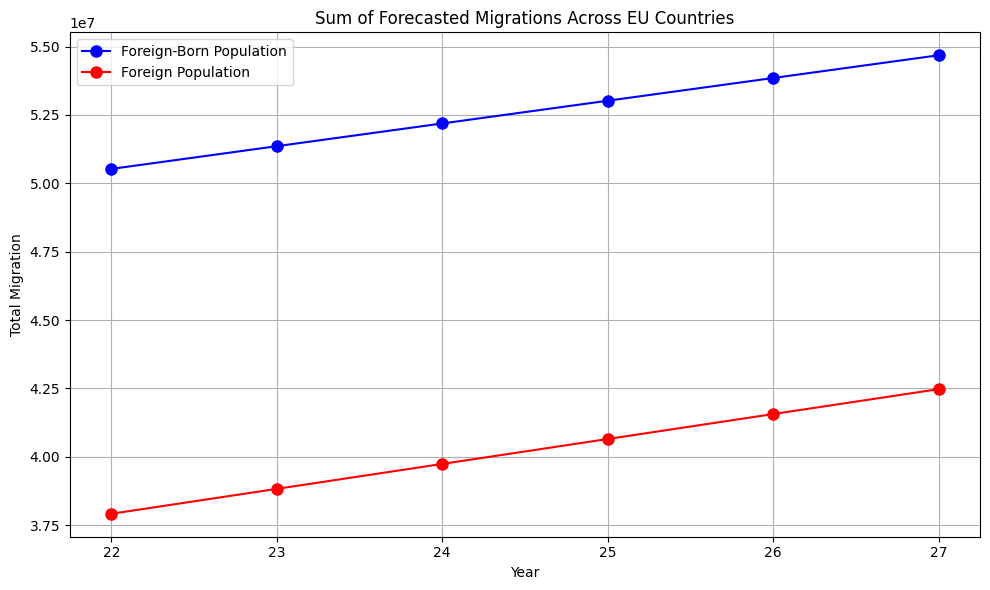

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define future years including 2023
future_years_extended = np.arange(len(year_columns), len(year_columns) + 6).reshape(-1, 1)

# Function to generate forecasts
def generate_forecasts(data):
    forecast_results = []
    for country in data['Country'].unique():
        country_data = data[data['Country'] == country][year_columns].values[0]
        X = np.arange(len(year_columns)).reshape(-1, 1)  # Include all years for training
        y = country_data
        missing_values = np.isnan(y)
        if np.any(missing_values):
            X = X[~missing_values]
            y = y[~missing_values]
        model = LinearRegression()
        model.fit(X, y)
        forecast = np.round(model.predict(np.concatenate([future_years_extended], axis=1)), 2)
        forecast_results.append({'Country': country, 'Forecast': forecast})
    return pd.DataFrame(forecast_results)

# Generate forecasts for both eu_foreign_born and eu_foreign_population
forecast_eu_foreign_born = generate_forecasts(eu_foreign_born)
forecast_eu_foreign_population = generate_forecasts(eu_foreign_population)

# Plotting the sum of forecasted migrations for foreign-born population
plt.figure(figsize=(10, 6))
sum_forecast_born = forecast_eu_foreign_born['Forecast'].sum(axis=0)  # Sum across countries for each year
plt.plot(future_years_extended.flatten(), sum_forecast_born, color='blue', marker='o', markersize=8, label='Foreign-Born Population')

# Plotting the sum of forecasted migrations for foreign population
sum_forecast_population = forecast_eu_foreign_population['Forecast'].sum(axis=0)  # Sum across countries for each year
plt.plot(future_years_extended.flatten(), sum_forecast_population, color='red', marker='o', markersize=8, label='Foreign Population')

plt.title('Sum of Forecasted Migrations Across EU Countries')
plt.xlabel('Year')
plt.ylabel('Total Migration')
plt.grid(True)
plt.xticks(future_years_extended.flatten())  # Set xticks as the future years
plt.legend()
plt.tight_layout()
plt.show()


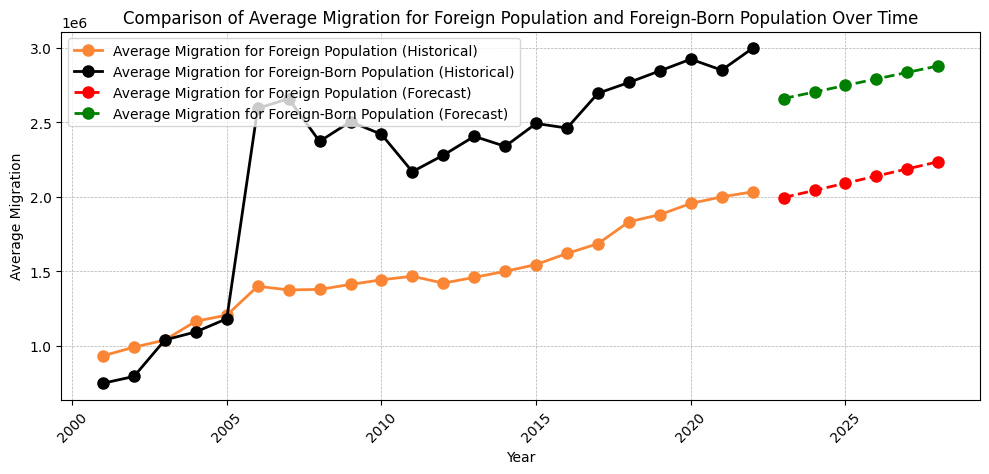

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Historical data for the years 2000 to 2022
historical_years = year_columns
average_migration_foreign_population_historical = eu_foreign_population[year_columns].mean().values
average_migration_foreign_born_historical = eu_foreign_born[year_columns].mean().values

# Forecasted data for the years 2023 to 2028
forecast_years = np.arange(2023, 2029)
average_migration_foreign_population_forecast = forecast_eu_foreign_population['Forecast'].mean(axis=0)
average_migration_foreign_born_forecast = forecast_eu_foreign_born['Forecast'].mean(axis=0)

# Set up figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot historical data
ax.plot(historical_years, average_migration_foreign_population_historical, color='#fa8635', linewidth=2, marker='o', markersize=8, label='Average Migration for Foreign Population (Historical)')
ax.plot(historical_years, average_migration_foreign_born_historical, color='black', linewidth=2, marker='o', markersize=8, label='Average Migration for Foreign-Born Population (Historical)')

# Plot forecasted data
ax.plot(forecast_years, average_migration_foreign_population_forecast, color='red', linewidth=2, marker='o', markersize=8, linestyle='--', label='Average Migration for Foreign Population (Forecast)')
ax.plot(forecast_years, average_migration_foreign_born_forecast, color='green', linewidth=2, marker='o', markersize=8, linestyle='--', label='Average Migration for Foreign-Born Population (Forecast)')

# Set plot title and labels
ax.set_title('Comparison of Average Migration for Foreign Population and Foreign-Born Population Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Average Migration')
ax.grid(axis='both', linestyle='--', linewidth=0.5)
ax.legend(loc='upper left')

# Adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Save plot to a PNG file
plt.savefig('resources/generated-charts/line-chart-stock-forecast.png', dpi=300)

# Show plot
plt.show()


In [44]:
pdf = FPDF()
pdf.add_page()

# First Page

#Header
pdf.set_font("Courier", 'B', 12)
pdf.cell(0, 10, 'Immigration Data', 0, 1, 'C')
pdf.set_fill_color(250, 134, 53)
pdf.rect(x=0, y=0, w=210, h=57, style='F')
pdf.image(f'resources/assets/logo.png', x=0, y=0, w=57, h=57)
pdf.set_font("Courier", size=32)
pdf.set_text_color(255, 255, 255)  # Set text color to white
pdf.text(x=55, y=35, txt="Data analytics report")

#Bar Chart
img_w = 150
img_h = 120
img_x = (pdf.w - img_w) / 2
img_y = ((pdf.h - img_h) / 2) - 25
pdf.image(f'resources/generated-charts/bar-chart-average-change-stock.png', x=img_x, y=img_y, w=img_w, h=img_h)

#Bar Chart Header
pdf.set_fill_color(0, 0, 0)
# Set text color (white)

pdf.rect(0, 57, pdf.w, 12, 'F')
# Set font and size for the text
pdf.set_font("Courier", size=12)
# Set text color for the text inside the box (black)
pdf.set_text_color(255, 255, 255)
# Add the text inside the box
text = "Average Change in Population Across EU"
pdf.text(pdf.w/2 - 42, 64, text)

img_w = 11.5*10
img_h = 13*10 -5
img_x = (pdf.w - img_w) + 5
img_y = ((pdf.h - img_h)) + 15
pdf.image(f'resources/generated-charts/heat-map-foreign.png', x=img_x, y=img_y, w=img_w, h=img_h)

img_w = 11.5*10
img_h = 13*10 - 5
img_x = -7.5
img_y = ((pdf.h - img_h)) +15
pdf.image(f'resources/generated-charts/heat-map-foreign_born.png', x=img_x, y=img_y, w=img_w, h=img_h)

# Draw a rectangle to create the box
pdf.rect(0, 187, pdf.w, 12, 'F')
# Set font and size for the text
pdf.set_font("Courier", size=12)
# Set text color for the text inside the box (black)
pdf.set_text_color(255, 255, 255)
# Add the text inside the box
text = "Heat Map"
pdf.text(pdf.w/2 - 17, 193, text)


used_countries = ['Austria', 'Belgium', 'Czechia', 
                  'Denmark', 'Estonia', 'Finland', 
                  'France', 'Germany', 'Greece', 
                  'Hungary', 'Italy', 'Latvia', 
                  'Luxembourg', 'Netherlands', 
                  'Poland', 'Portugal',
                  'Slovenia', 'Spain', 'Sweden']

# Time Series Pages    
for i in range(1,5):
    selected = used_countries[(i-1)*6:((i-1)*6) + 6]
    pdf.add_page()
    
    #Header
    pdf.set_font("Courier", size = 12)
    pdf.cell(0, 10, 'Immigration Data', 0, 1, 'C')
    pdf.set_fill_color(250, 134, 53)
    pdf.rect(x=0, y=0, w=210, h=18, style='F')
    pdf.set_font("Courier", size=18)
    pdf.set_text_color(255, 255, 255)  # Set text color to white
    pdf.text(x=12, y=9, txt="Population change across each EU country")
    
    # Image size and spacing
    img_width = 80
    img_height = 80
    spacing = 10
    
    # Position variables
    x = 15
    y = 15
    # Loop through images
    for country in selected:
        img_path = f'resources/generated-charts/line-chart-stock-{country}.png'
        pdf.image(img_path, x, y, img_width, img_height)
        pdf.set_fill_color(0,0,0)
        pdf.rect(x=x, y=y + 5, w=25, h=7, style='F')
        pdf.set_font("Courier", 'B', 10)
        pdf.set_text_color(255, 255, 255)
        pdf.text(x + 2, y + 9, country)
        # Move to the next position
        x += img_width + spacing
        
        # If reached the end of the row, move to the next row
        if x > pdf.w - img_width - spacing:
            x = 10
            y += img_height + spacing




#Time Series Line Chart
img_w = 11.5*10*1.4
img_h = 13*10*1.4
img_x = (pdf.w - img_w) / 2
img_y = ((pdf.h - img_h) / 2) + 35
pdf.image(f'resources/generated-charts/line-chart-stock-total.png', x=img_x, y=img_y, w=img_w, h=img_h)

pdf.set_fill_color(0, 0, 0)
# Set text color (white)

# Draw a rectangle to create the box
pdf.rect(0, 100, pdf.w, 12, 'F')
# Set font and size for the text
pdf.set_font("Arial", size=12)
# Set text color for the text inside the box (black)
pdf.set_text_color(255, 255, 255)
# Add the text inside the box
text = "Time Series Analysis of Total Inflow/Outflow of EU Countries"
pdf.text(pdf.w/2- 60, 106, text)


events = {
    '2005-2006': '''
    EU Enlargement: The mid-2000s saw significant changes in the EU with the accession of several
    Central and Eastern European countries in 2004 and 2007. This enlargement led to increased
    migration flows within the EU, as citizens from newly acceded countries gained the right to live and
    work in other EU member states. As a result, the "Stock of foreign-born population" in certain EU
    countries may have surged due to increased migration from these new member states, while the
    "Stock of foreign population by nationality" may not have captured this influx if migrants retained
    their original nationality.''',

    '2010-2015': '''
    Economic Recession: The global financial crisis of 2008 had a significant impact on the European
    economy, leading to a recession in many countries. High unemployment rates and economic
    uncertainty may have deterred migration to some EU countries 

    Changes in Migration Policies: Some EU countries implemented stricter immigration policies or
    introduced measures to reduce immigration during this period in response to economic challenges or
    political pressures. Tighter border controls, visa restrictions, and changes to residency and work
    permit requirements may have affected the inflow of foreign-born individuals.
    '''
    }


# Event Summary Page
pdf.add_page()
pdf.set_font("Courier", size = 12)
pdf.cell(0, 10, 'Immigration Data', 0, 1, 'C')
pdf.set_fill_color(250, 134, 53)
pdf.rect(x=0, y=0, w=210, h=18, style='F')
pdf.set_font("Courier", size=18)
pdf.set_text_color(255, 255, 255)  # Set text color to white
pdf.text(x=12, y=9, txt="Key Events")

pdf.set_fill_color(0, 0, 0)
# Set text color (white)

pdf.rect(0, 18, pdf.w, 20, 'F')
# Set font and size for the text
pdf.set_font("Courier", size=12)
# Set text color for the text inside the box (black)
pdf.set_text_color(255, 255, 255)
# Add the text inside the box
text = "Based on the analysis of population inflow acrss 2000-2022, it was determined that the years with the highest population spike/dip are:"
pdf.multi_cell(pdf.w - 12.5, 5, txt=text)

items = 0
diff = 60
for year, event in events.items():

    pdf.set_fill_color(0,0,0)
    pdf.rect(x=13, y= 44 + items*diff, w=25, h=7, style='F')
    pdf.set_font("Courier", 'B', 10)
    pdf.set_text_color(255, 255, 255)
    pdf.text(15, 47.5 + items*diff, year)

    pdf.set_font("Times", size=11)
    pdf.set_text_color(0, 0, 0)
    pdf.set_xy(10, 51.5 + items*diff)
    pdf.multi_cell(pdf.w - 12.5, 6, txt=event)
    items += 1


# Forecast Page
pdf.add_page()
pdf.set_font("Courier", size = 12)
pdf.cell(0, 10, 'Immigration Data', 0, 1, 'C')
pdf.set_fill_color(250, 134, 53)
pdf.rect(x=0, y=0, w=210, h=18, style='F')
pdf.set_font("Courier", size=18)
pdf.set_text_color(255, 255, 255)  # Set text color to white
pdf.text(x=12, y=9, txt="Forecasting")

context = 'Several forecasting models were examined for the forecasting of future population including ARIMA, SARIMAX, Random Forest Regressor. However, due to the limited amount of data, it was decided that a simple linear regression would be suitable.'
header = 'Regression Model'

pdf.set_fill_color(0,0,0)
pdf.rect(x=12, y=34, w=25, h=7, style='F')
pdf.set_font("Courier", 'B', 10)
pdf.set_text_color(255, 255, 255)
pdf.text(15, 38, header)

pdf.set_text_color(20,0,0)
pdf.set_font("Times", size = 12)
pdf.set_xy(10, 45)
pdf.multi_cell(pdf.w - 12.5, 6, txt=context)

pdf.set_fill_color(0, 0, 0)
# Set text color (white)

#Time Series Line Chart
img_w = 11.5*10*1.6
img_h = 13*10*1.6
img_x = (pdf.w - img_w) / 2
img_y = ((pdf.h - img_h) / 2) + 32
pdf.image(f'resources/generated-charts/line-chart-stock-forecast.png', x=img_x, y=img_y, w=img_w, h=img_h)


# Draw a rectangle to create the box
pdf.rect(0, 85, pdf.w, 12, 'F')
# Set font and size for the text
pdf.set_font("Arial", size=12)
# Set text color for the text inside the box (black)
pdf.set_text_color(255, 255, 255)
# Add the text inside the box
text = "Time Series Analysis with Forecasting"
pdf.text(pdf.w/2- 38, 91, text)

# Save the PDF
pdf_file = "population_stock_report.pdf"
pdf.output(pdf_file)
print(f"PDF report generated: {pdf_file}")

PDF report generated: population_stock_report.pdf
